In [18]:
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns

# OUTIL  IBM

## pour les Volumes
possibilité de récupérer les données sur la base de données mysql
procédure non faite mais il faut juste créer la connection, interroger la base et alimenter le df_ibm_volume, idem pour df_3par_volume

In [2]:
## récupération des volumes ibm 
df_ibm_volume_plus = pd.read_csv("df_ibm_volume_plus.csv")
df_ibm_volume_plus.date = df_ibm_volume_plus.date.map(lambda x :  datetime.datetime.strptime(x,'%Y-%m-%d'))
df_ibm_volume_plus = df_ibm_volume_plus.sort_values(by='date')
df_ibm_volume_plus

,ID,name,pool,offre,capacity,used_capacity,date,origine,typologie,client
0,0,INFS_19DC1_T0M_TEST_EXLIDAT1_01,SDC3_T0,T0,10.0,9.830000,2018-10-03,ibm,DAT,INF
315,266,HARN_19DC1_T0S_ESX_01_T0,SDC3_T0,T0,420.0,201.530000,2018-10-03,ibm,AUTRE,Client_non_enregistré
314,266,HARN_19DC1_T0S_ESX_01_T0,SDC1_T0,T0,420.0,201.800000,2018-10-03,ibm,AUTRE,Client_non_enregistré
313,265,HARN_19DC1_T0M_ESX_01,SDC3_T0,T0,510.0,0.030029,2018-10-03,ibm,AUTRE,Client_non_enregistré
312,265,HARN_19DC1_T0M_ESX_01,SDC1_T0,T0,510.0,0.030029,2018-10-03,ibm,AUTRE,Client_non_enregistré
...,...,...,...,...,...,...,...,...,...,...
518312,275,LNAS_19DC1_T2S_ORALNAR_INF_FG1_01,SDC1_T2,T2,200.0,8.560000,2020-11-13,ibm,DAT,LNA
518313,276,LNAS_19DC1_T2S_ORALNAR_INF_FG1_02,SDC1_T2,T2,200.0,14.550000,2020-11-13,ibm,DAT,LNA
518314,277,LNAS_19DC3_T0S_ORALNAR_CRS_FG2_01,SDC3_T0,T0,2.0,0.109131,2020-11-13,ibm,DAT,LNA
518316,279,LNAS_19DC3_T2S_ORALNAR_DATA_FG2_01,SDC3_T2,T2,300.0,86.770000,2020-11-13,ibm,DAT,LNA


In [3]:
df_ibm_volume_plus[df_ibm_volume_plus.used_capacity.isnull()]

,ID,name,pool,offre,capacity,used_capacity,date,origine,typologie,client


In [4]:
# nombre d'enregistrements non typés.
df_ibm_volume_plus.typologie.value_counts()

DAT      323622
VIR      181012
AUTRE     13713
WEB         570
Name: typologie, dtype: int64

[62.36488687015457, 2.642619147185388, 34.8826498264655, 0.10984415619453593]


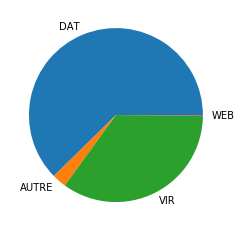

In [5]:
# Create a pieplot
liste_typo = df_ibm_volume_plus.typologie.unique()
pourcentage =[df_ibm_volume_plus[df_ibm_volume_plus.typologie==typo].count()[0]/len(df_ibm_volume_plus)*100 for typo in liste_typo]
print(pourcentage)
plt.pie(pourcentage, labels = liste_typo)

plt.show()

No handles with labels found to put in legend.


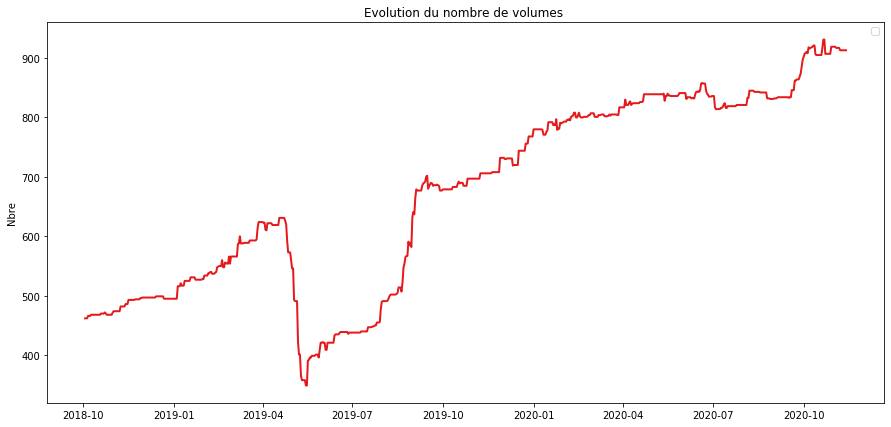

In [6]:
# visualisation de l'évolution du nb de volumes 

fig = plt.figure(1, figsize=(15, 7))
# create a color palette
palette = plt.get_cmap('Set1')
num=0

x = df_ibm_volume_plus.date.unique()
y = df_ibm_volume_plus.groupby('date').name.count()
plt.plot( x, y,marker='', color=palette(num), linewidth=2)
plt.title('Evolution du nombre de volumes ')
plt.ylabel('Nbre')
plt.legend()

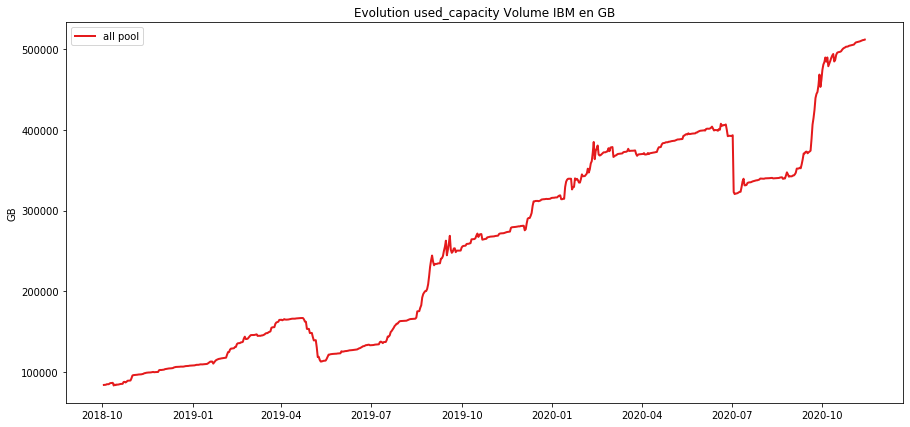

In [7]:
# visualisation de l'évolution des données pour les volumes IBM

fig = plt.figure(1, figsize=(15, 7))

num=0
x = df_ibm_volume_plus.date.unique()
y = df_ibm_volume_plus.groupby('date').used_capacity.sum()
plt.plot( x, y,marker='', color=palette(num), linewidth=2, label="all pool")
plt.title('Evolution used_capacity Volume IBM en GB')
plt.ylabel('GB')
plt.legend()

In [8]:
# visualisation de l'évolution de la saturation moyenne des  volumes IBM

fig = plt.figure(1, figsize=(15, 7))

num=0
x = df_ibm_volume_plus.date.unique()
y = df_ibm_volume_plus.groupby('date').pourcentage_used.mean()
plt.plot( x, y,marker='', color=palette(num), linewidth=2, label="all pool")
plt.title('Evolution moyenne de saturation des Volumes IBM ')
plt.ylabel('%')
plt.legend()

AttributeError: 'DataFrameGroupBy' object has no attribute 'pourcentage_used'

<Figure size 1080x504 with 0 Axes>

In [9]:
# visualisation de l'évolution de la saturation du volume particulier IBM

fig = plt.figure(1, figsize=(15, 7))
x = df_ibm_volume_plus[df_ibm_volume_plus.name == 'MUTN_19DC1_T0S_ORASIP_DATA_01'].date
y = df_ibm_volume_plus[df_ibm_volume_plus.name == 'MUTN_19DC1_T0S_ORASIP_DATA_01'].pourcentage_used
plt.plot( x, y,marker='', color=palette(num), linewidth=2, label="MUTN_19DC1_T0S_ORASIP_DATA_01")
plt.title('Evolution moyenne de saturation du volume MUTN_19DC1_T0S_ORASIP_DATA_01')
plt.ylabel('% de saturation')
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'pourcentage_used'

<Figure size 1080x504 with 0 Axes>

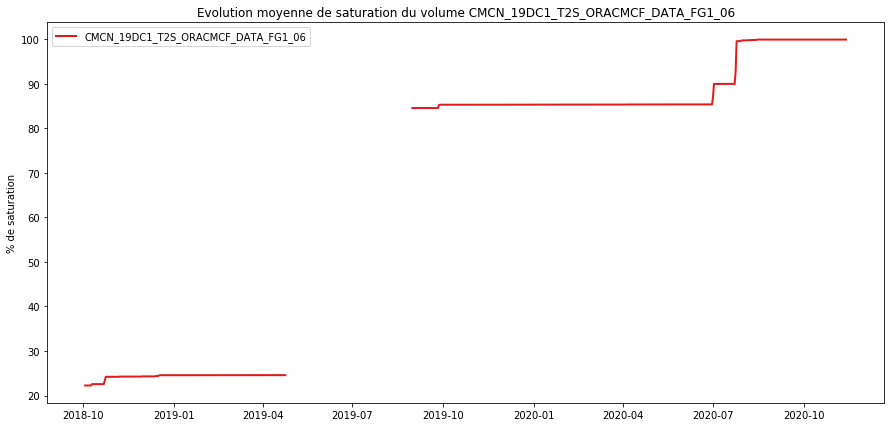

In [11]:
# visualisation de l'évolution de la saturation du volume particulier IBM

fig = plt.figure(1, figsize=(15, 7))
x = df_ibm_volume_plus[df_ibm_volume_plus.name == 'CMCN_19DC1_T2S_ORACMCF_DATA_FG1_06'].date
y = df_ibm_volume_plus[df_ibm_volume_plus.name == 'CMCN_19DC1_T2S_ORACMCF_DATA_FG1_06'].pourcentage_used
plt.plot( x, y,marker='', color=palette(num), linewidth=2, label="CMCN_19DC1_T2S_ORACMCF_DATA_FG1_06")
plt.title('Evolution moyenne de saturation du volume CMCN_19DC1_T2S_ORACMCF_DATA_FG1_06')
plt.ylabel('% de saturation')
plt.legend()

In [11]:
# création dune liste de pools  et une liste d'offre

liste_pools = sorted(df_ibm_volume_plus.pool.unique())
liste_offres = sorted(df_ibm_volume_plus.offre.unique())
liste_typos = sorted(df_ibm_volume_plus.typologie.unique())

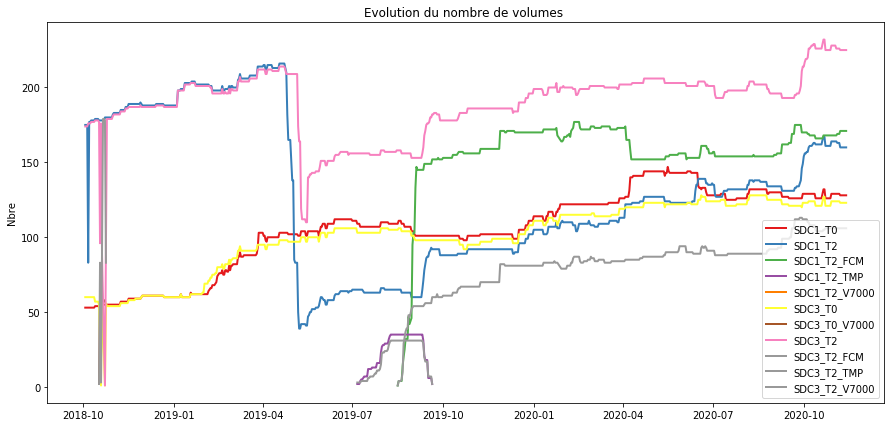

In [12]:
# visualisation de l'évolution du nb de volumes 

fig = plt.figure(1, figsize=(15, 7))
# create a color palette
palette = plt.get_cmap('Set1')
num=0
for pool in liste_pools:
    x = df_ibm_volume_plus[df_ibm_volume_plus.pool == pool].date.unique()
    y = df_ibm_volume_plus[df_ibm_volume_plus.pool == pool].groupby('date').name.count()
    plt.plot( x, y,marker='', color=palette(num), linewidth=2, label=pool)
    num+=1
plt.title('Evolution du nombre de volumes ')
plt.ylabel('Nbre')

plt.legend()

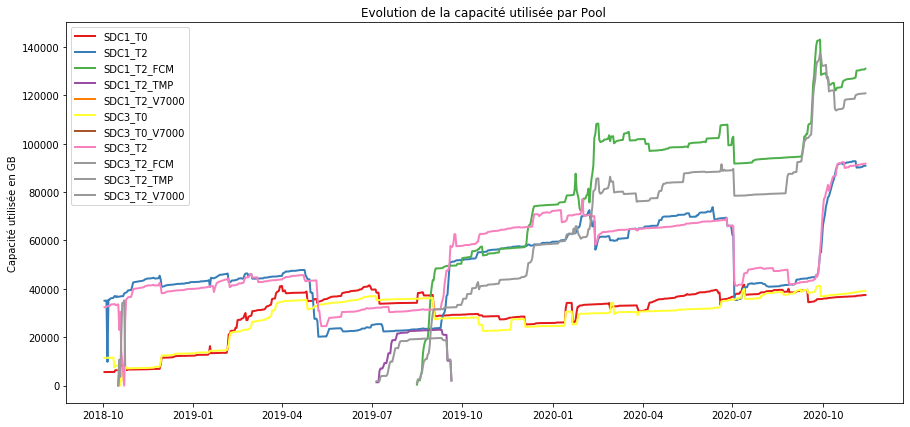

In [13]:
# visualisation de l'évolution de la capacité utilisée de volumes 
fig = plt.figure(1, figsize=(15, 7))
num=0
for pool in liste_pools:
    df_temp = df_ibm_volume_plus[df_ibm_volume_plus.pool == pool]
    x = df_temp.date.unique()
    y = df_temp.groupby(by=['date']).used_capacity.sum()
    plt.plot( x, y, marker='', label=pool, color = palette(num), linewidth=2 )
    num+=1
    
plt.title('Evolution de la capacité utilisée par Pool ')
plt.ylabel('Capacité utilisée en GB')
plt.legend()

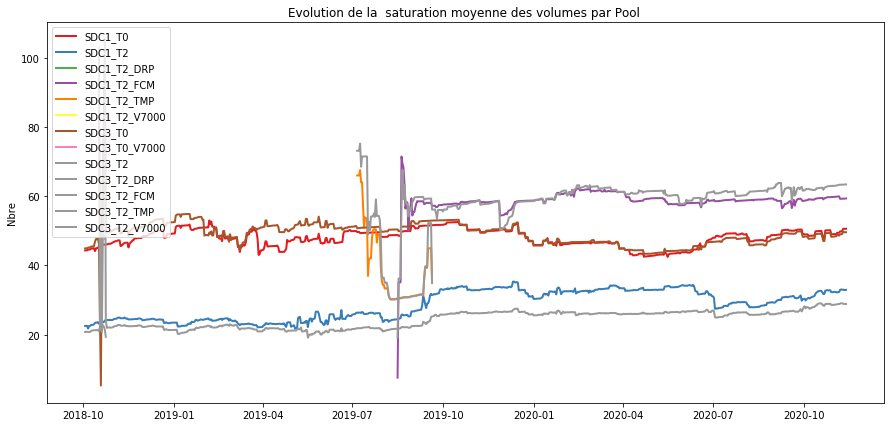

In [15]:
# visualisation de l'évolution de la saturation moyenne des volumes par pool

fig = plt.figure(1, figsize=(15, 7))
num=0
for pool in liste_pools:
    df_temp = df_ibm_volume_plus[df_ibm_volume_plus.pool == pool]
    x = df_temp.date.unique()
    y = df_temp.groupby(by=['date']).pourcentage_used.mean()
    plt.plot( x, y, marker='', label=pool, color = palette(num), linewidth=2 )
    num+=1
    
plt.title('Evolution de la  saturation moyenne des volumes par Pool ')
plt.ylabel('Nbre')
plt.legend()

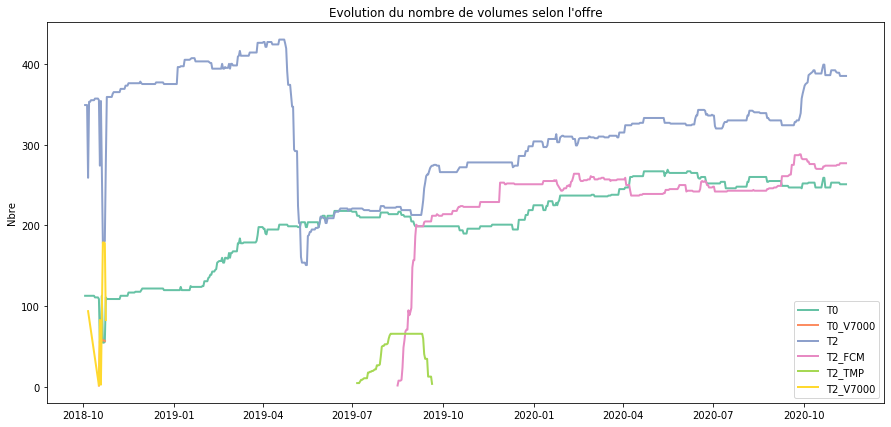

In [14]:
# visualisation de l'évolution du nb de volumes par offre
plts =[]
fig = plt.figure(1, figsize=(15, 7))
palette2 = plt.get_cmap('Set2')
num=0
for offre in liste_offres:
    x = df_ibm_volume_plus[df_ibm_volume_plus.offre == offre].date.unique()
    y = df_ibm_volume_plus[df_ibm_volume_plus.offre == offre].groupby('date').name.count()
    plt.plot( x, y,marker='', color=palette2(num), linewidth=2, label=offre)
    num+=1
plt.title("Evolution du nombre de volumes selon l'offre")
plt.ylabel('Nbre')
plt.legend()

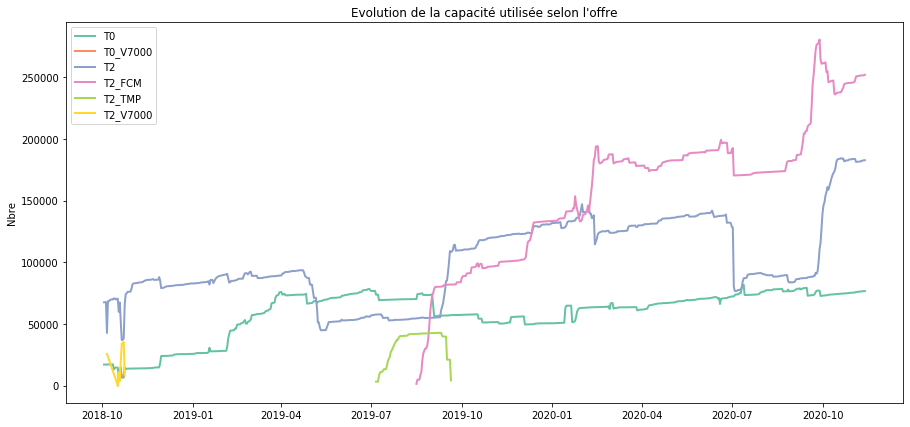

In [15]:
# visualisation de l'évolution de la capacité utilisée par offre
plts =[]
fig = plt.figure(1, figsize=(15, 7))
palette2 = plt.get_cmap('Set2')
num=0
for offre in liste_offres:
    x = df_ibm_volume_plus[df_ibm_volume_plus.offre == offre].date.unique()
    y = df_ibm_volume_plus[df_ibm_volume_plus.offre == offre].groupby('date').used_capacity.sum()
    plt.plot( x, y,marker='', color=palette2(num), linewidth=2, label=offre)
    num+=1
plt.title("Evolution de la capacité utilisée selon l'offre")
plt.ylabel('Nbre')
plt.legend()

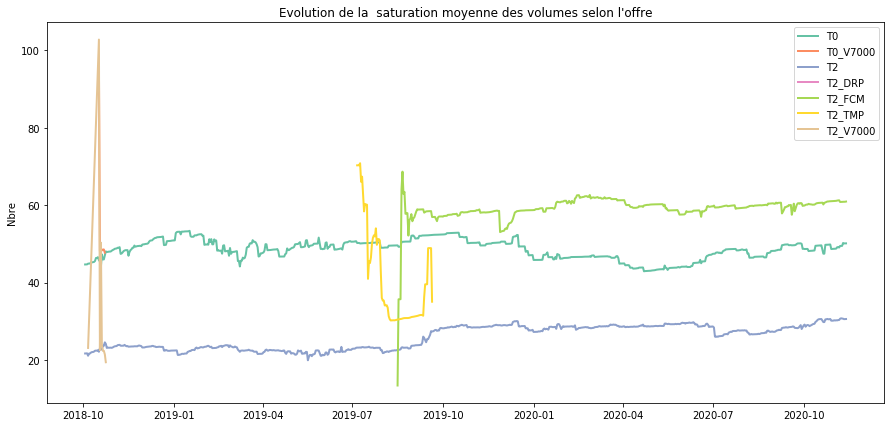

In [18]:
# visualisation de l'évolution de la saturation moyenne des volumes par offre
plts =[]
fig = plt.figure(1, figsize=(15, 7))
palette2 = plt.get_cmap('Set2')
num=0
for offre in liste_offres:
    x = df_ibm_volume_plus[df_ibm_volume_plus.offre == offre].date.unique()
    y = df_ibm_volume_plus[df_ibm_volume_plus.offre == offre].groupby('date').pourcentage_used.mean()
    plt.plot( x, y,marker='', color=palette2(num), linewidth=2, label=offre)
    num+=1
plt.title("Evolution de la  saturation moyenne des volumes selon l'offre")
plt.ylabel('Nbre')
plt.legend()

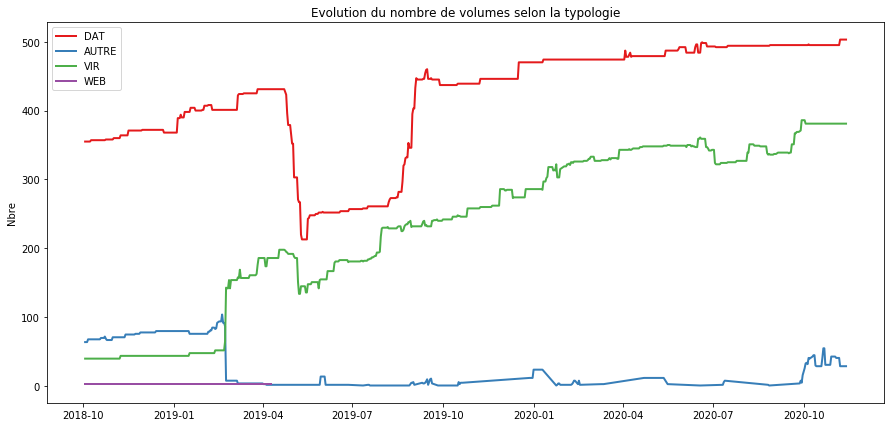

In [16]:
# visualisation de l'évolution du nb de volumes par typologie

fig = plt.figure(1, figsize=(15, 7))

num=0
for typo in liste_typo:
    x = df_ibm_volume_plus[df_ibm_volume_plus.typologie == typo].date.unique()
    y = df_ibm_volume_plus[df_ibm_volume_plus.typologie == typo].groupby('date').name.count()
    plt.plot( x, y,marker='', color=palette(num), linewidth=2, label=typo)
    num+=1
plt.title("Evolution du nombre de volumes selon la typologie")
plt.ylabel('Nbre')
plt.legend()

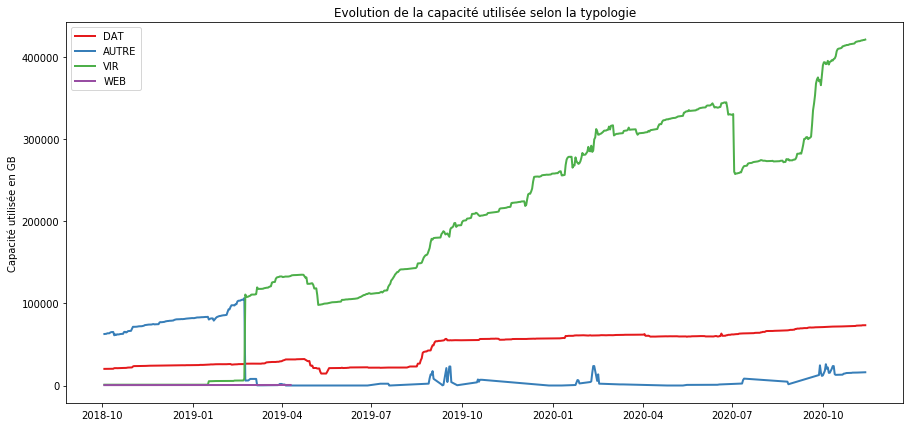

In [17]:
# visualisation de l'évolution da la capcité utilisée par typologie de volumes
fig = plt.figure(1, figsize=(15, 7))
num=0
for typo in liste_typo:
    x = df_ibm_volume_plus[df_ibm_volume_plus.typologie == typo].date.unique()
    y = df_ibm_volume_plus[df_ibm_volume_plus.typologie == typo].groupby('date').used_capacity.sum()
    plt.plot( x, y,marker='', color=palette(num), linewidth=2, label=typo)
    num+=1
plt.title("Evolution de la capacité utilisée selon la typologie")
plt.ylabel('Capacité utilisée en GB')
plt.legend()

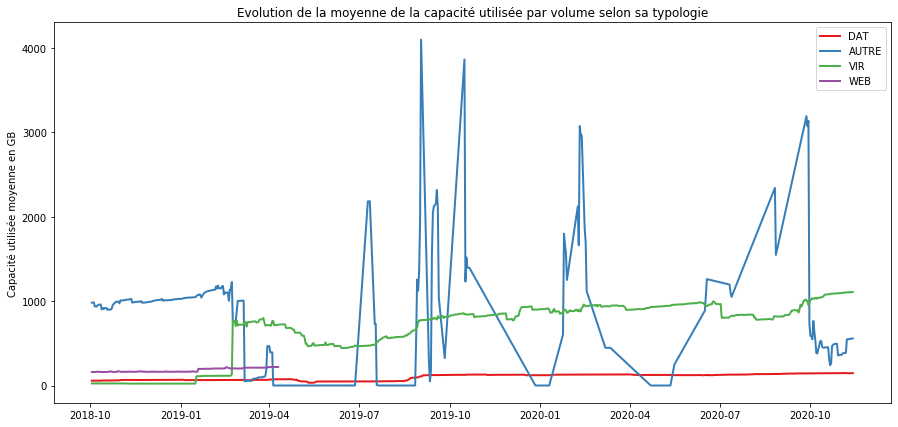

In [21]:
# visualisation de l'évolution da la capacité utilisée moyenne ppour un volume par typologie de volumes
fig = plt.figure(1, figsize=(15, 7))
num=0
for typo in liste_typo:
    x = df_ibm_volume_plus[df_ibm_volume_plus.typologie == typo].date.unique()
    y = df_ibm_volume_plus[df_ibm_volume_plus.typologie == typo].groupby('date').used_capacity.sum()/df_ibm_volume_plus[df_ibm_volume_plus.typologie == typo].groupby('date').name.count()
    plt.plot( x, y,marker='', color=palette(num), linewidth=2, label=typo)
    num+=1
plt.title("Evolution de la moyenne de la capacité utilisée par volume selon sa typologie")
plt.ylabel('Capacité utilisée moyenne en GB')
plt.legend()

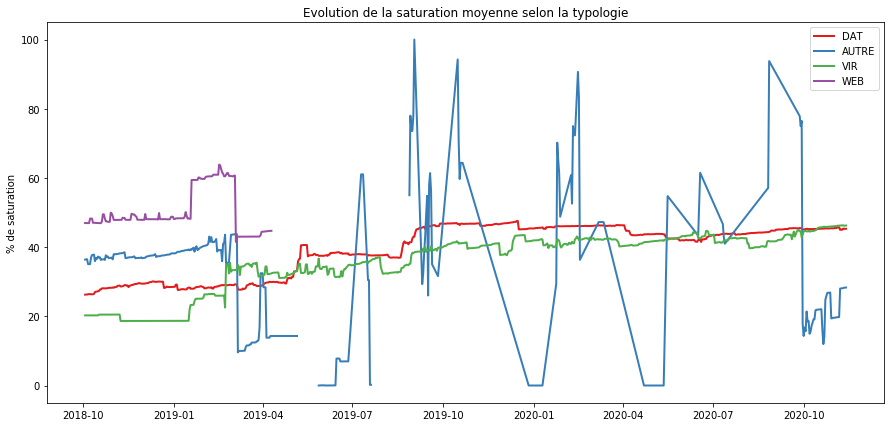

In [22]:
# visualisation de l'évolution de la saturation moyenne par typologie de volumes

fig = plt.figure(1, figsize=(15, 7))

num=0
for typo in liste_typo:
    x = df_ibm_volume_plus[df_ibm_volume_plus.typologie == typo].date.unique()
    y = df_ibm_volume_plus[df_ibm_volume_plus.typologie == typo].groupby('date').pourcentage_used.mean()
    plt.plot( x, y,marker='', color=palette(num), linewidth=2, label=typo)
    num+=1
plt.title("Evolution de la saturation moyenne selon la typologie")
plt.ylabel('% de saturation')
plt.legend()

In [23]:
df_ibm_volume_plus

,ID,name,pool,offre,capacity,used_capacity,date,origine,pourcentage_used,typologie,client
0,0,INFS_19DC1_T0M_TEST_EXLIDAT1_01,SDC3_T0,T0,10.0,9.830000,2018-10-03,ibm,98.300000,DAT,Client_non_enregistré
315,266,HARN_19DC1_T0S_ESX_01_T0,SDC3_T0,T0,420.0,201.530000,2018-10-03,ibm,47.983333,AUTRE,Client_non_enregistré
314,266,HARN_19DC1_T0S_ESX_01_T0,SDC1_T0,T0,420.0,201.800000,2018-10-03,ibm,48.047619,AUTRE,Client_non_enregistré
313,265,HARN_19DC1_T0M_ESX_01,SDC3_T0,T0,510.0,0.030029,2018-10-03,ibm,0.005888,AUTRE,Client_non_enregistré
312,265,HARN_19DC1_T0M_ESX_01,SDC1_T0,T0,510.0,0.030029,2018-10-03,ibm,0.005888,AUTRE,Client_non_enregistré
...,...,...,...,...,...,...,...,...,...,...,...
546637,275,LNAS_19DC1_T2S_ORALNAR_INF_FG1_01,SDC1_T2,T2,200.0,8.560000,2020-11-13,ibm,4.280000,DAT,LNA
546638,276,LNAS_19DC1_T2S_ORALNAR_INF_FG1_02,SDC1_T2,T2,200.0,14.550000,2020-11-13,ibm,7.275000,DAT,LNA
546639,277,LNAS_19DC3_T0S_ORALNAR_CRS_FG2_01,SDC3_T0,T0,2.0,0.109131,2020-11-13,ibm,5.456543,DAT,LNA
546641,279,LNAS_19DC3_T2S_ORALNAR_DATA_FG2_01,SDC3_T2,T2,300.0,86.770000,2020-11-13,ibm,28.923333,DAT,LNA


Text(0.5, 1.0, 'Disctribution de la capacité des volumes IBM')

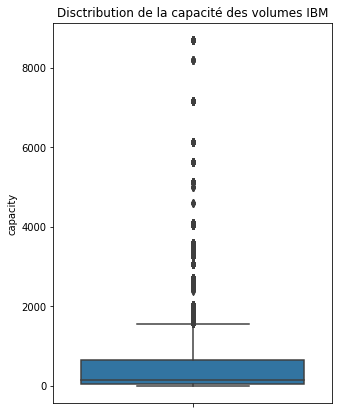

In [24]:
# représentation de la capacité des volumes IBM
fig = plt.figure(1, figsize=(5, 7))
sns.boxplot( df_ibm_volume_plus.capacity ,orient ="v")
plt.title("Disctribution de la capacité des volumes IBM")

Text(0.5, 1.0, 'Disctribution de la capacité utilisée des volumes IBM')

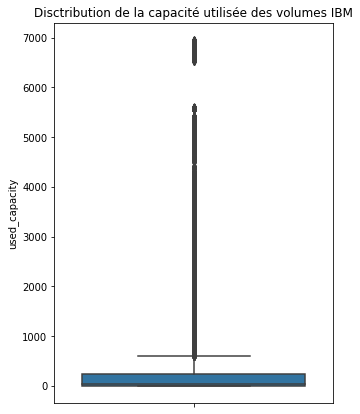

In [25]:
# représentation de la capacité utilisée des volumes IBM
fig = plt.figure(1, figsize=(5, 7))
sns.boxplot( df_ibm_volume_plus.used_capacity ,orient ="v")
plt.title("Disctribution de la capacité utilisée des volumes IBM")

Text(0.5, 1.0, 'Disctribution de la saturation des volumes IBM')

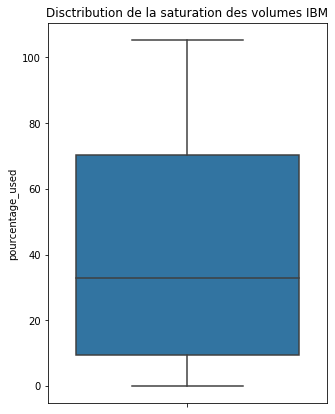

In [26]:
# représentation de la saturation des volumes  IBM
fig = plt.figure(1, figsize=(5, 7))
sns.boxplot( df_ibm_volume_plus.pourcentage_used ,orient ="v")
plt.title("Disctribution de la saturation des volumes IBM")

In [27]:
df_ibm_month = df_ibm_volume_plus.copy()
liste_année_mois = []
for i in df_ibm_month.date:

    liste_année_mois.append(str(i)[:7])
df_ibm_month['année_mois'] =liste_année_mois
df_ibm_month

,ID,name,pool,offre,capacity,used_capacity,date,origine,pourcentage_used,typologie,client,année_mois
0,0,INFS_19DC1_T0M_TEST_EXLIDAT1_01,SDC3_T0,T0,10.0,9.830000,2018-10-03,ibm,98.300000,DAT,Client_non_enregistré,2018-10
315,266,HARN_19DC1_T0S_ESX_01_T0,SDC3_T0,T0,420.0,201.530000,2018-10-03,ibm,47.983333,AUTRE,Client_non_enregistré,2018-10
314,266,HARN_19DC1_T0S_ESX_01_T0,SDC1_T0,T0,420.0,201.800000,2018-10-03,ibm,48.047619,AUTRE,Client_non_enregistré,2018-10
313,265,HARN_19DC1_T0M_ESX_01,SDC3_T0,T0,510.0,0.030029,2018-10-03,ibm,0.005888,AUTRE,Client_non_enregistré,2018-10
312,265,HARN_19DC1_T0M_ESX_01,SDC1_T0,T0,510.0,0.030029,2018-10-03,ibm,0.005888,AUTRE,Client_non_enregistré,2018-10
...,...,...,...,...,...,...,...,...,...,...,...,...
546637,275,LNAS_19DC1_T2S_ORALNAR_INF_FG1_01,SDC1_T2,T2,200.0,8.560000,2020-11-13,ibm,4.280000,DAT,LNA,2020-11
546638,276,LNAS_19DC1_T2S_ORALNAR_INF_FG1_02,SDC1_T2,T2,200.0,14.550000,2020-11-13,ibm,7.275000,DAT,LNA,2020-11
546639,277,LNAS_19DC3_T0S_ORALNAR_CRS_FG2_01,SDC3_T0,T0,2.0,0.109131,2020-11-13,ibm,5.456543,DAT,LNA,2020-11
546641,279,LNAS_19DC3_T2S_ORALNAR_DATA_FG2_01,SDC3_T2,T2,300.0,86.770000,2020-11-13,ibm,28.923333,DAT,LNA,2020-11


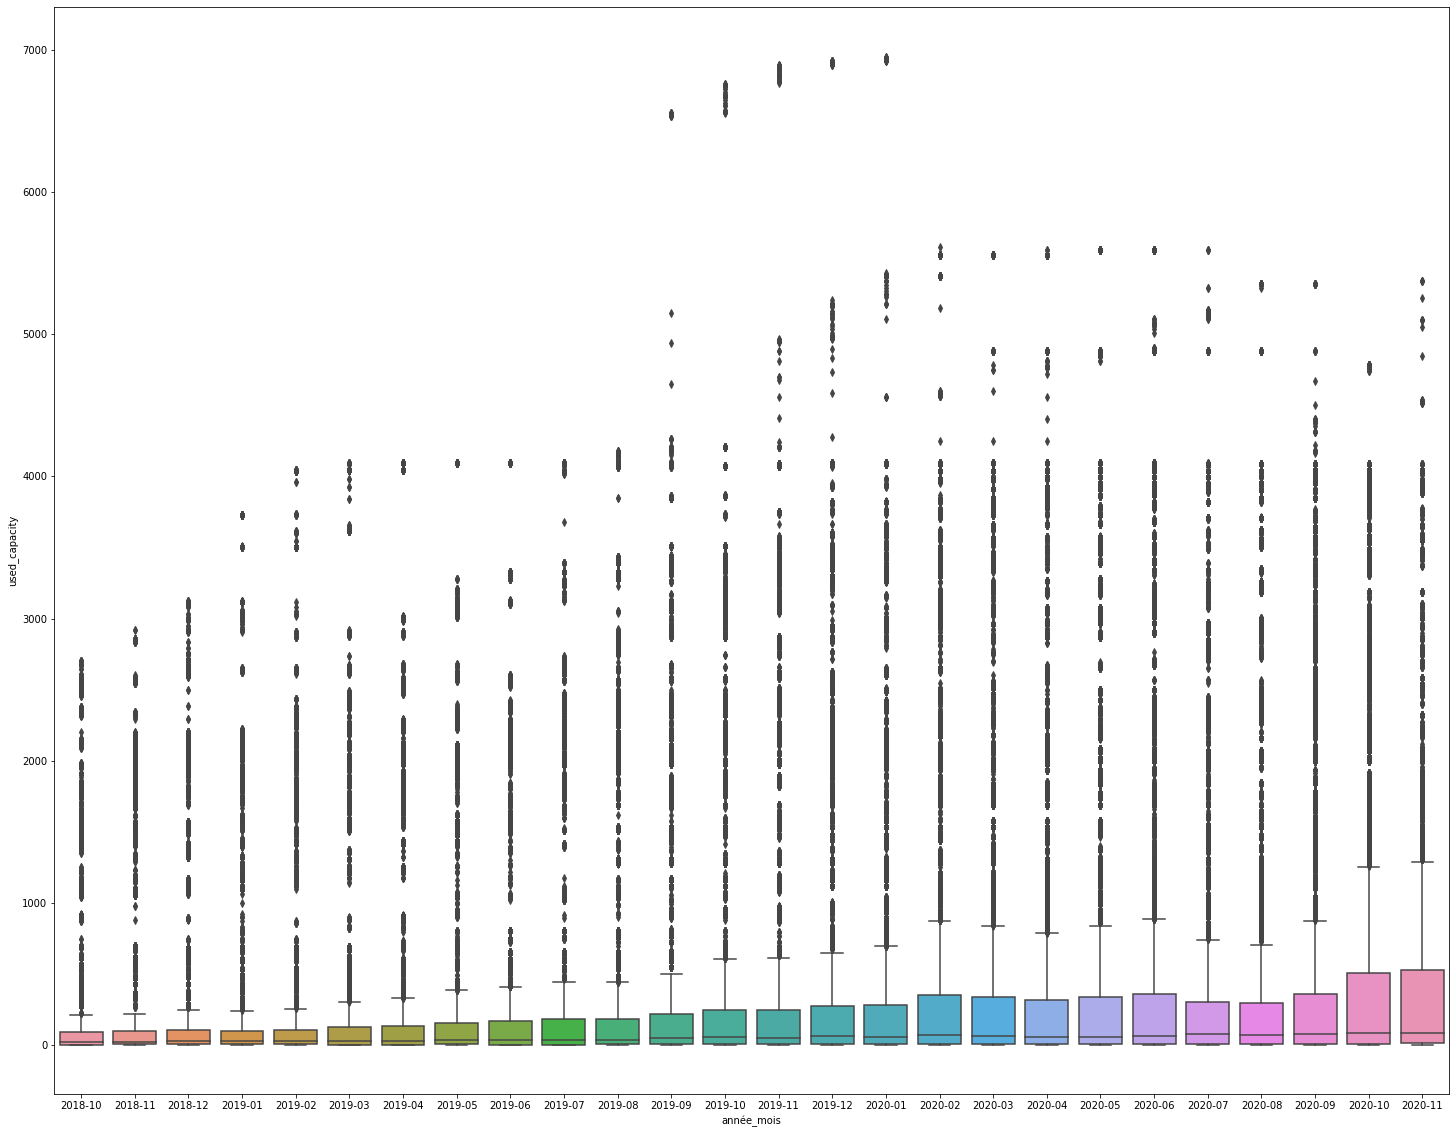

In [28]:
fig, ax = plt.subplots(figsize=(25,20))
sns.boxplot(df_ibm_month.année_mois, df_ibm_month.used_capacity)

Text(0.5, 1.0, 'Dispersion de la saturation des volumes')

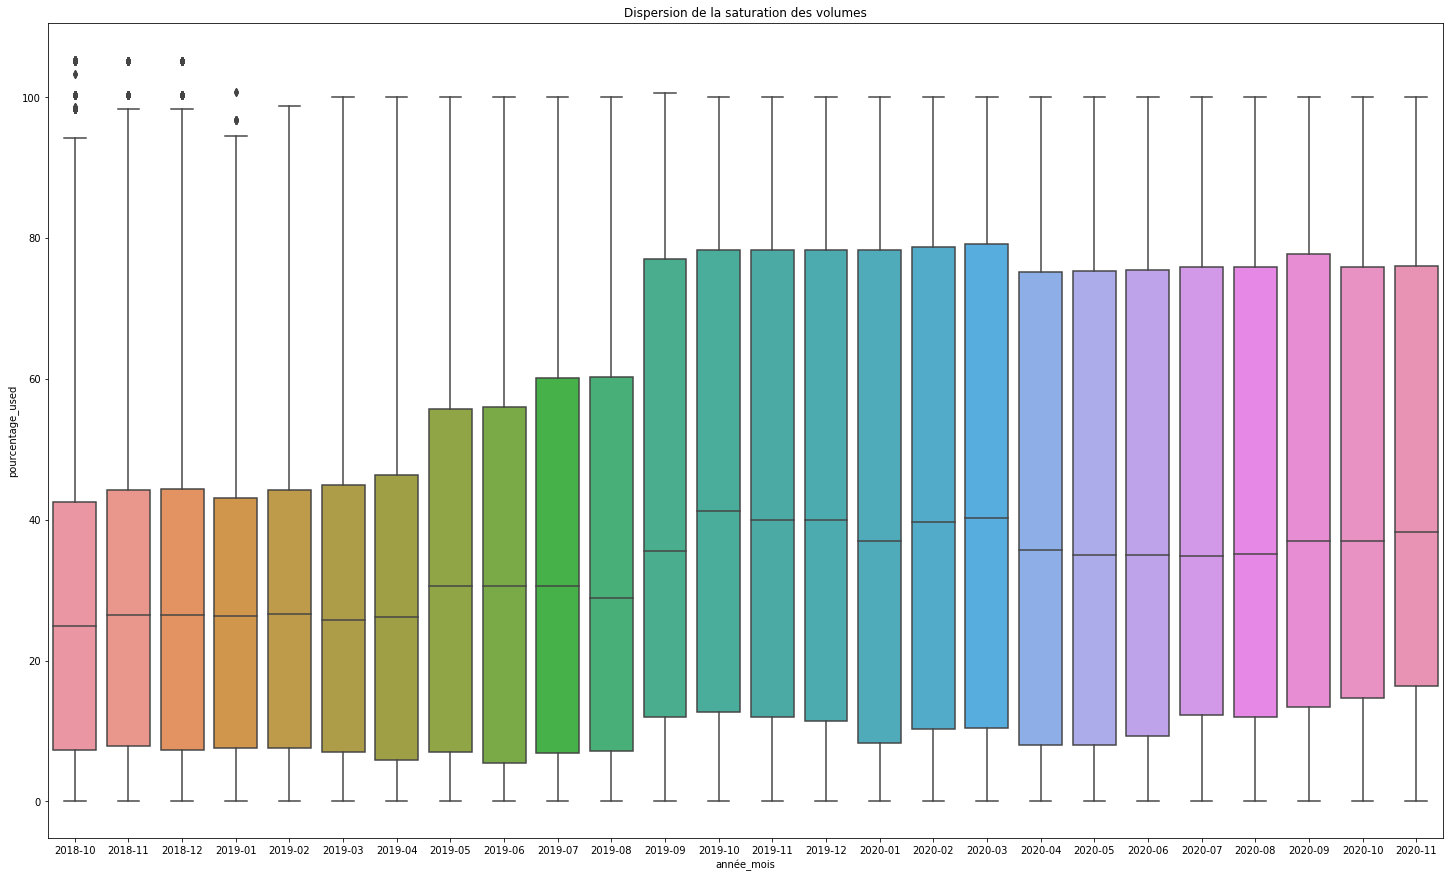

In [29]:
fig, ax = plt.subplots(figsize=(25,15))
sns.boxplot(df_ibm_month.année_mois, df_ibm_month.pourcentage_used)
plt.title ('Dispersion de la saturation des volumes')

In [30]:
# création de listes des métriques sur la capacité utilisée des volumes

dates=[]
count = []
mean =[]
std =[]
val_min =[]
val_max =[]
quartile25 =[]
quartile50 =[]
quartile75 =[]
for date in df_ibm_month.année_mois.unique():
    dates.append(date)
    count.append(df_ibm_month[df_ibm_month.année_mois == date].used_capacity.describe()['count'])
    mean.append(df_ibm_month[df_ibm_month.année_mois == date].used_capacity.describe()['mean'])
    std.append(df_ibm_month[df_ibm_month.année_mois == date].used_capacity.describe()['std'])
    val_min.append(df_ibm_month[df_ibm_month.année_mois == date].used_capacity.describe()['min'])
    val_max.append(df_ibm_month[df_ibm_month.année_mois == date].used_capacity.describe()['max'])
    quartile25.append(df_ibm_month[df_ibm_month.année_mois == date].used_capacity.describe()['25%'])
    quartile50.append(df_ibm_month[df_ibm_month.année_mois == date].used_capacity.describe()['50%'])
    quartile75.append(df_ibm_month[df_ibm_month.année_mois == date].used_capacity.describe()['75%'])
    
array = np.array([mean,std,val_min,val_max,quartile25,quartile50, quartile75])
df_month_variables = pd.DataFrame(array, index = ["mean","std","val_min","val_max","quartile25","quartile50", "quartile75"], columns =dates)
df_month_variables

,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,...,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
mean,185.159506,203.788205,213.668160,214.897010,242.417830,255.580737,266.906876,301.785019,300.516112,323.328316,...,455.175448,461.335543,454.102742,468.175645,476.007071,409.702728,407.103968,458.372155,540.515272,555.674497
std,459.608061,492.090478,515.893756,532.522939,593.906265,618.438390,640.143951,676.525586,682.476855,723.061245,...,892.930879,915.895876,919.204058,940.607896,945.494960,825.757814,826.816601,883.624388,951.906159,971.808345
val_min,0.000156,0.000156,0.000732,0.000156,0.000156,0.000156,0.000732,0.000156,0.000156,0.000732,...,0.000156,0.000732,0.000732,0.000732,0.000732,0.000156,0.000732,0.000732,0.000156,0.000732
val_max,2703.360000,2918.400000,3123.200000,3727.360000,4044.800000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,...,5611.520000,5560.320000,5591.040000,5591.040000,5591.040000,5591.040000,5355.520000,5355.520000,4782.080000,5376.000000
quartile25,3.040000,5.197500,5.720000,5.440000,5.440000,2.740000,2.520000,4.200000,1.600000,1.620000,...,6.270000,6.090000,3.515000,3.430000,4.420000,7.230000,6.980000,8.720000,9.170000,10.740000
quartile50,21.210000,22.440000,30.420000,27.770000,30.420000,30.520000,30.510000,32.950000,31.760000,31.850000,...,66.780000,66.340000,59.270000,57.630000,62.080000,74.120000,71.350000,77.880000,84.920000,85.840000
quartile75,89.605000,97.500000,102.645000,99.630000,105.792500,122.940000,133.980000,157.170000,165.530000,180.850000,...,352.997500,338.750000,317.715000,340.410000,357.180000,299.760000,295.590000,357.260000,507.880000,527.880000


In [31]:
df_month_variables = df_month_variables.T

In [32]:
df_month_variables

,mean,std,val_min,val_max,quartile25,quartile50,quartile75
2018-10,185.159506,459.608061,0.000156,2703.36,3.0400,21.21,89.6050
2018-11,203.788205,492.090478,0.000156,2918.40,5.1975,22.44,97.5000
2018-12,213.668160,515.893756,0.000732,3123.20,5.7200,30.42,102.6450
2019-01,214.897010,532.522939,0.000156,3727.36,5.4400,27.77,99.6300
2019-02,242.417830,593.906265,0.000156,4044.80,5.4400,30.42,105.7925
2019-03,255.580737,618.438390,0.000156,4096.00,2.7400,30.52,122.9400
2019-04,266.906876,640.143951,0.000732,4096.00,2.5200,30.51,133.9800
2019-05,301.785019,676.525586,0.000156,4096.00,4.2000,32.95,157.1700
2019-06,300.516112,682.476855,0.000156,4096.00,1.6000,31.76,165.5300
2019-07,323.328316,723.061245,0.000732,4096.00,1.6200,31.85,180.8500


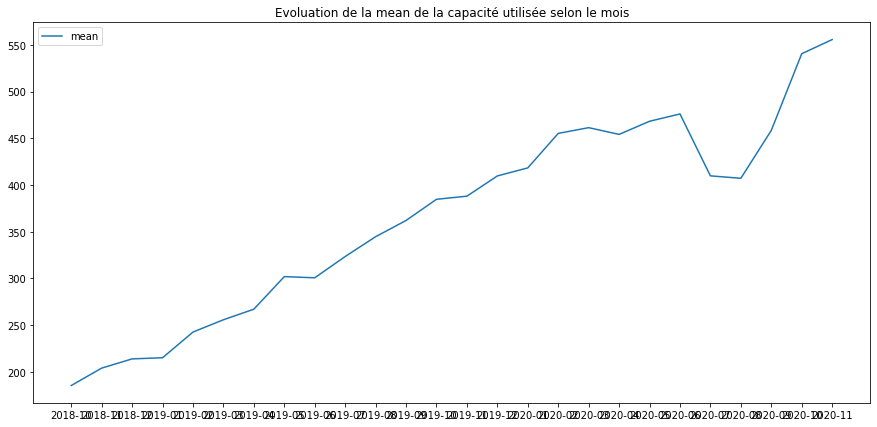

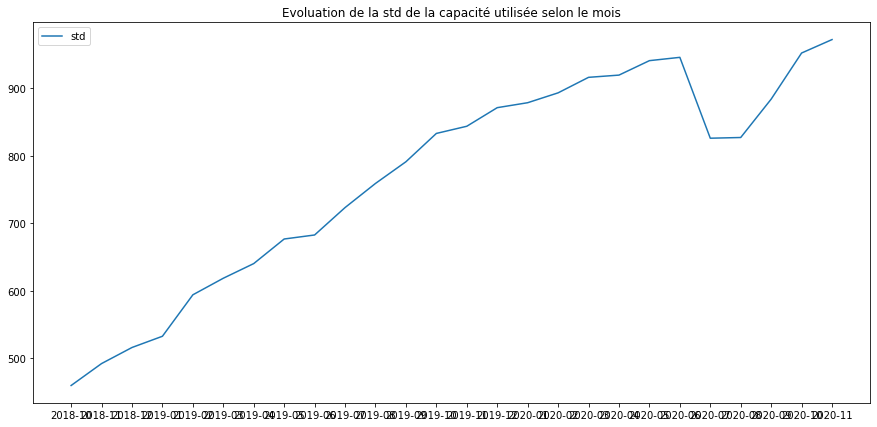

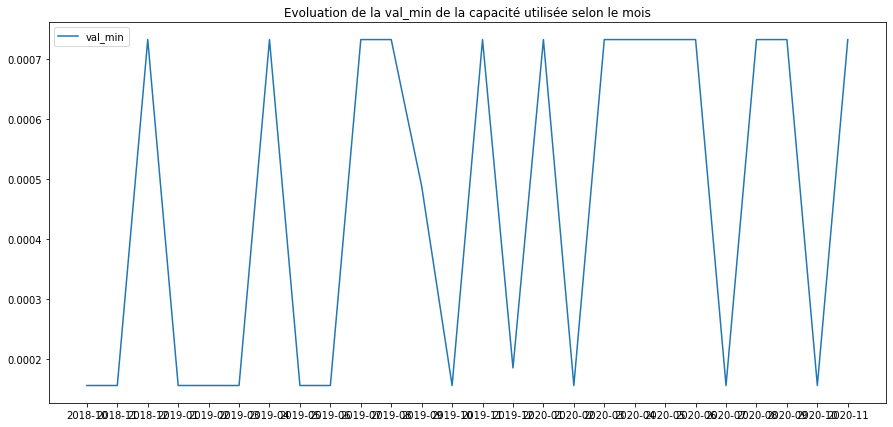

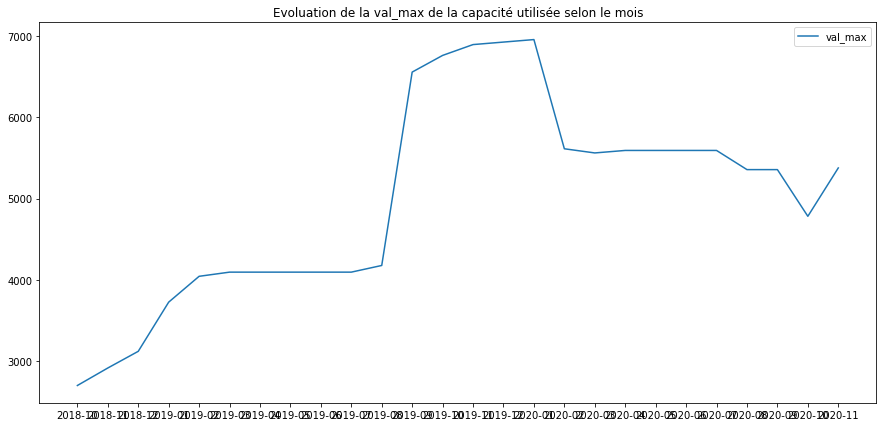

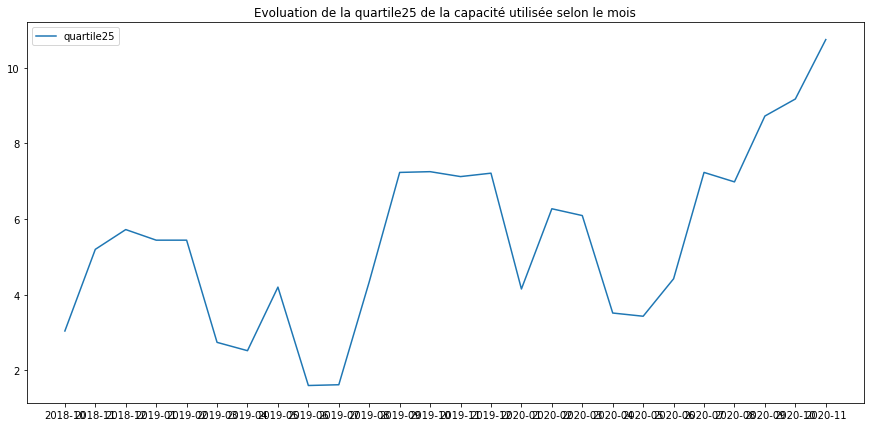

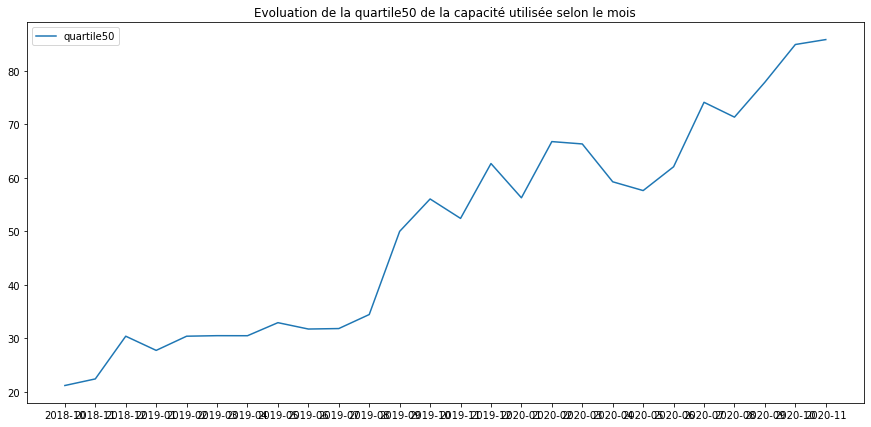

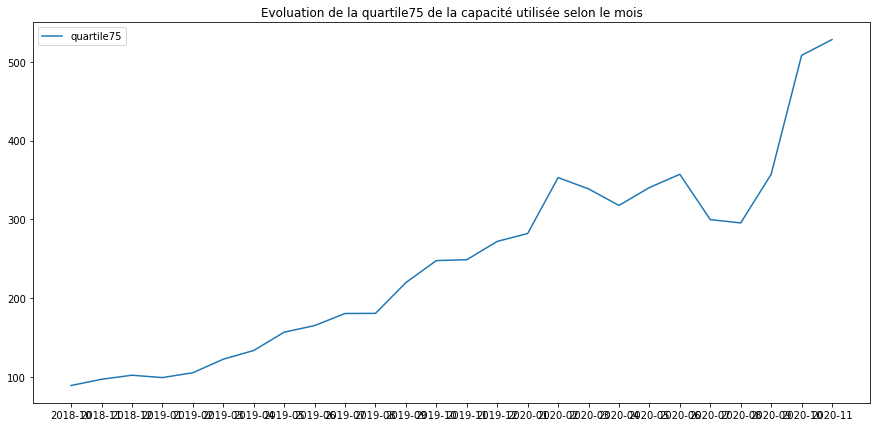

In [33]:
# Représentation de l'évolution des métriques de la capacité utilisée
i =1
for courbe in ['mean',"std","val_min","val_max","quartile25","quartile50", "quartile75"]:
    fig = plt.figure(i, figsize=(15, 7))
    plt.plot(df_month_variables[courbe], label = courbe)
    plt.title("Evoluation de la "+ str(courbe) + ' de la capacité utilisée selon le mois')
    plt.legend()
    i+=1

In [34]:
# création de listes des métriques sur la saturation des volumes

dates=[]
count = []
mean =[]
std =[]
val_min =[]
val_max =[]
quartile25 =[]
quartile50 =[]
quartile75 =[]
for date in df_ibm_month.année_mois.unique():
    dates.append(date)
    count.append(df_ibm_month[df_ibm_month.année_mois == date].used_capacity.describe()['count'])
    mean.append(df_ibm_month[df_ibm_month.année_mois == date].used_capacity.describe()['mean'])
    std.append(df_ibm_month[df_ibm_month.année_mois == date].used_capacity.describe()['std'])
    val_min.append(df_ibm_month[df_ibm_month.année_mois == date].used_capacity.describe()['min'])
    val_max.append(df_ibm_month[df_ibm_month.année_mois == date].used_capacity.describe()['max'])
    quartile25.append(df_ibm_month[df_ibm_month.année_mois == date].used_capacity.describe()['25%'])
    quartile50.append(df_ibm_month[df_ibm_month.année_mois == date].used_capacity.describe()['50%'])
    quartile75.append(df_ibm_month[df_ibm_month.année_mois == date].used_capacity.describe()['75%'])
    
array = np.array([mean,std,val_min,val_max,quartile25,quartile50, quartile75])
df_month_variables = pd.DataFrame(array, index = ["mean","std","val_min","val_max","quartile25","quartile50", "quartile75"], columns =dates)
df_month_variables = df_month_variables.T
df_month_variables

,mean,std,val_min,val_max,quartile25,quartile50,quartile75
2018-10,185.159506,459.608061,0.000156,2703.36,3.0400,21.21,89.6050
2018-11,203.788205,492.090478,0.000156,2918.40,5.1975,22.44,97.5000
2018-12,213.668160,515.893756,0.000732,3123.20,5.7200,30.42,102.6450
2019-01,214.897010,532.522939,0.000156,3727.36,5.4400,27.77,99.6300
2019-02,242.417830,593.906265,0.000156,4044.80,5.4400,30.42,105.7925
2019-03,255.580737,618.438390,0.000156,4096.00,2.7400,30.52,122.9400
2019-04,266.906876,640.143951,0.000732,4096.00,2.5200,30.51,133.9800
2019-05,301.785019,676.525586,0.000156,4096.00,4.2000,32.95,157.1700
2019-06,300.516112,682.476855,0.000156,4096.00,1.6000,31.76,165.5300
2019-07,323.328316,723.061245,0.000732,4096.00,1.6200,31.85,180.8500


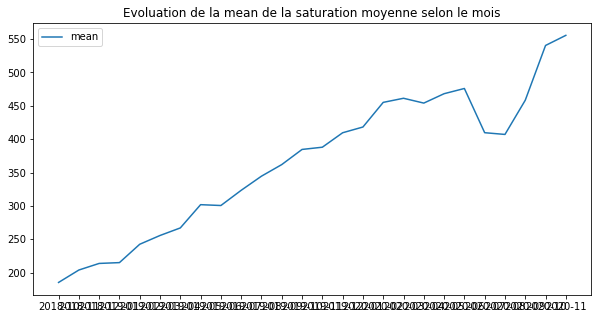

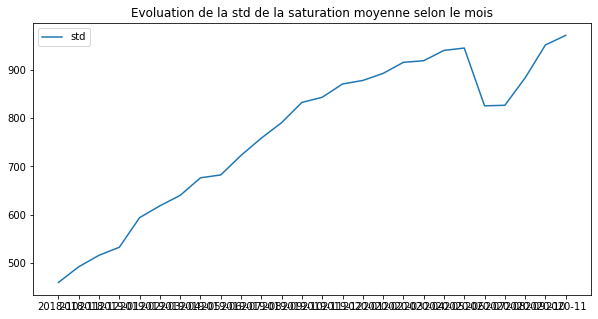

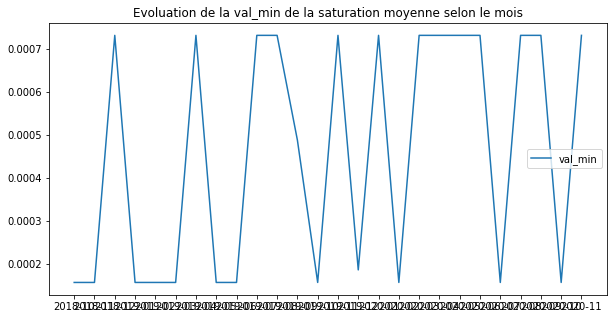

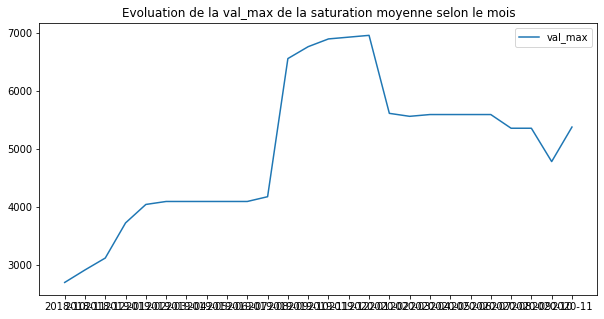

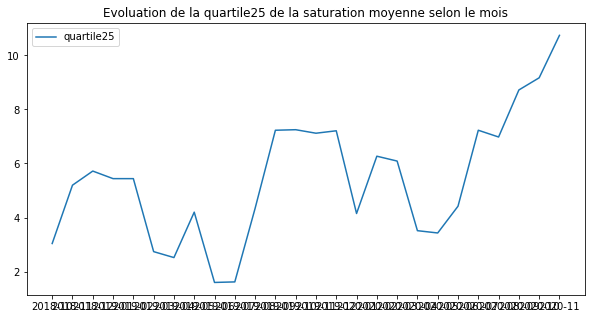

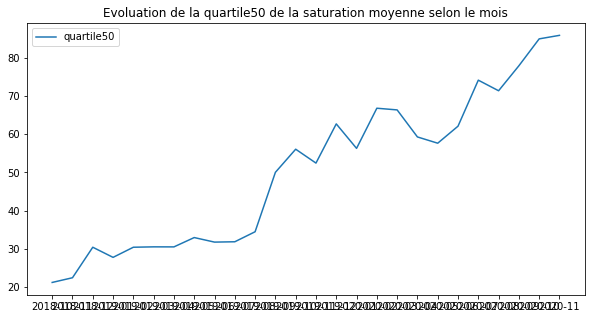

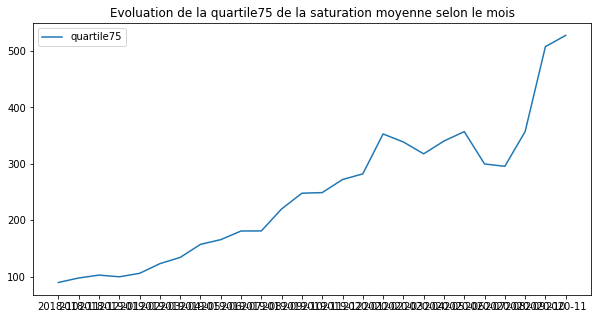

In [35]:
# Représentation de l'évolution des métriques de la saturation
i =1
for courbe in ['mean',"std","val_min","val_max","quartile25","quartile50", "quartile75"]:
    fig = plt.figure(i, figsize=(10, 5))
    plt.plot(df_month_variables[courbe], label = courbe)
    plt.title("Evoluation de la "+ str(courbe) + ' de la saturation moyenne selon le mois')
    plt.legend()
    i+=1

In [36]:
#A partir des fichiers XLM , création d'un dico avec en clé les pool et en valeur 
#la capacity maximale du pool en GB
maxi ={'SDC1_T0' : 47667,"SDC1_T2" : 56852, "SDC1_T2_FCM":183828, "SDC3_T0":47667,"SDC3_T2":56852, "SDC3_T2_FCM":183838}

used_01_09 = {'SDC1_T0' : 39557,"SDC1_T2" : 43889, "SDC1_T2_FCM":97178, "SDC3_T0":39957,"SDC3_T2":43735, "SDC3_T2_FCM":90501} 


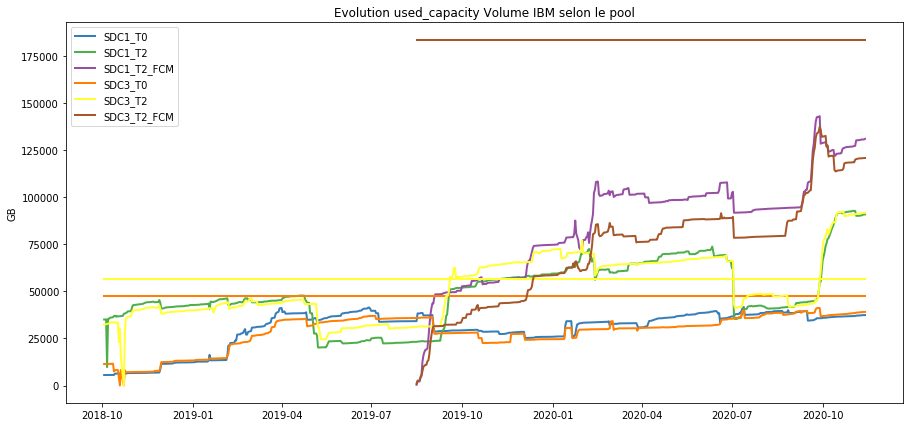

In [37]:
# visualisation de l'évolution des données pour les volumes IBM

fig = plt.figure(1, figsize=(15, 7))
# create a color palette
palette = plt.get_cmap('Set1')
num=0
list_pools = maxi.keys()

for pool in list_pools:
    num+=1
    df_temp = df_ibm_volume_plus[df_ibm_volume_plus.pool == pool].copy()
    x = df_temp.date.unique()
    y = df_temp.groupby(by=['date']).used_capacity.sum()
    plt.plot( x, y,marker='', color=palette(num), linewidth=2, label=pool)
    plt.plot( x, pd.Series(maxi[pool],index = range(len(x))),marker='', color=palette(num), linewidth=2)
plt.title('Evolution used_capacity Volume IBM selon le pool')
plt.ylabel('GB')
plt.legend()

In [38]:
df_ibm_volume_plus[df_ibm_volume_plus.date=="2020-09-01"].groupby('date').used_capacity.sum()

date
2020-09-01    343235.906279
Name: used_capacity, dtype: float64

# 3 PAR

 ## Pour les volumes

In [19]:
df_3par_volume_GB = pd.read_csv("df_3par_volume_GB.csv")
df_3par_volume_GB.date = df_3par_volume_GB.date.map(lambda x :  datetime.datetime.strptime(str(x)[:10],'%Y-%m-%d'))
df_3par_volume_GB = df_3par_volume_GB.sort_values(by='date')

No handles with labels found to put in legend.


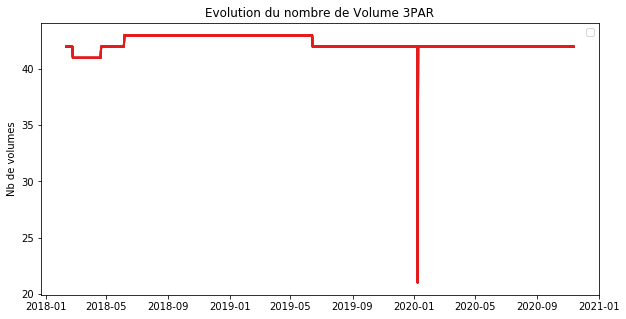

In [20]:
# visualisation de l'évolution du nombre de volumes 3par

fig = plt.figure(1, figsize=(10, 5))
num=0
x = df_3par_volume_GB.date.unique()
y = df_3par_volume_GB.groupby('date').count()
plt.plot( x, y,marker='', color=palette(num), linewidth=2)

plt.title('Evolution du nombre de Volume 3PAR')
plt.ylabel('Nb de volumes')
plt.legend()

No handles with labels found to put in legend.


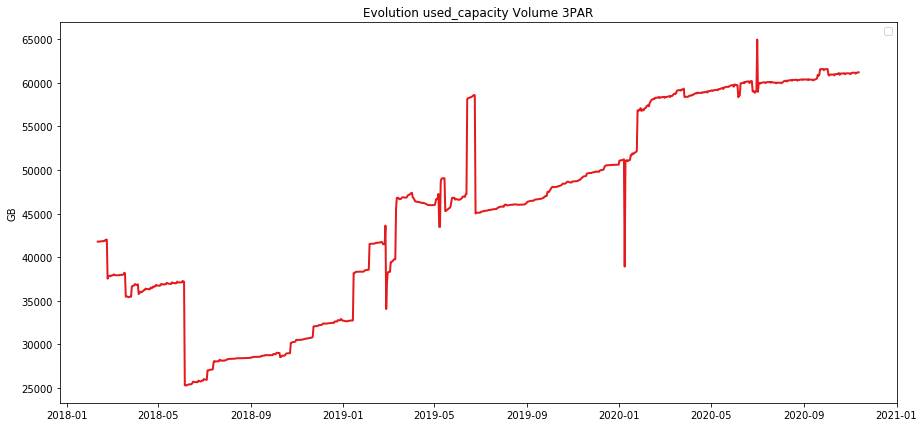

In [21]:
# visualisation de l'évolution des données pour les volumes 3par

fig = plt.figure(1, figsize=(15, 7))
num=0

x = df_3par_volume_GB.date.unique()
y = df_3par_volume_GB.groupby('date').used_capacity.sum()
plt.plot( x, y,marker='', color=palette(num), linewidth=2)
plt.title('Evolution used_capacity Volume 3PAR')
plt.ylabel('GB')
plt.legend()

In [22]:
# visualisation de l'évolution de la saturation des volumes 3par
fig = plt.figure(1, figsize=(15, 7))
num=0
x = df_3par_volume_GB.date.unique()
y = df_3par_volume_GB.groupby('date').pourcentage_used.mean()
plt.plot( x, y,marker='', color=palette(num), linewidth=2)
plt.title('Evolution de la moyenne de saturation Volume 3PAR')
plt.ylabel('GB')
plt.legend()

AttributeError: 'DataFrameGroupBy' object has no attribute 'pourcentage_used'

<Figure size 1080x504 with 0 Axes>

In [99]:
list_pool_3par = df_3par_volume_GB.pool.unique()

In [23]:
num=0
fig = plt.figure(1, figsize=(15, 7))
for pool in list_pool_3par:
    df_temp = df_3par_volume_GB[df_3par_volume_GB.pool == pool].copy() 
    x = df_temp.date.unique()
    y = df_temp.groupby('date').used_capacity.count()
    plt.plot( x, y,marker='', color=palette(num), linewidth=2, label=pool)
    num+=1
plt.title('Evolution nb de  Volume 3PAR selon le pool')
plt.ylabel('Nb de volumes')
plt.legend()   

NameError: name 'list_pool_3par' is not defined

<Figure size 1080x504 with 0 Axes>

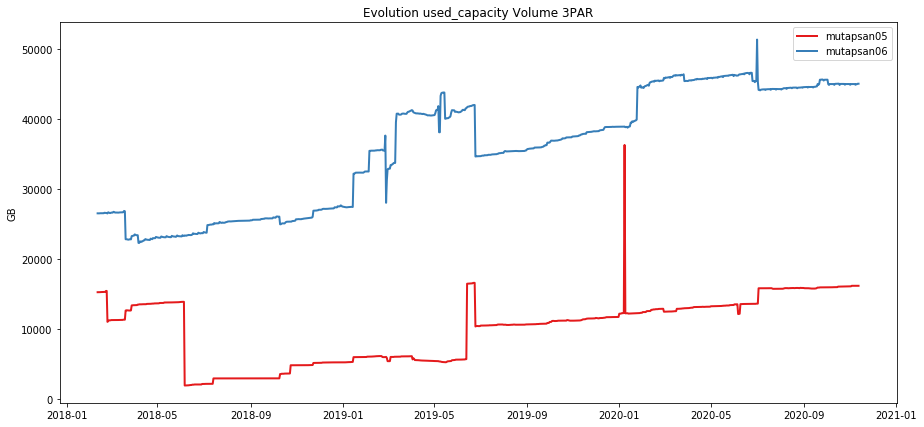

In [101]:
num=0
fig = plt.figure(1, figsize=(15, 7))
for pool in list_pool_3par:
    df_temp = df_3par_volume_GB[df_3par_volume_GB.pool == pool].copy() 
    x = df_temp.date.unique()
    y = df_temp.groupby('date').used_capacity.sum()
    plt.plot( x, y,marker='', color=palette(num), linewidth=2, label=pool)
    num+=1
plt.title('Evolution used_capacity Volume 3PAR')
plt.ylabel('GB')
plt.legend()   

In [102]:
#TEst pour voir si les volumes sont bien indépendants entre IBM et 3par
#for i in df_3par_volume_GB.name:
 #   if i in df_ibm_volume_GB.name.to_list():
  #      print(i)
        
## Pas de doublons. Les volumes IBM ne sont pas dans 3par.

In [80]:
df_3par_volume_GB

,ID,name,capacity,used_capacity,date,pool,offre,origine,client,pourcentage_used
0,70,GTGN_05T2N_DS_GTG_DATA_02,2248.0,2247.750000,2018-02-11,mutapsan05,T2,3par,GTG,99.988879
23,57,IPSS_06T2N_DS_02,2048.0,1738.625000,2018-02-11,mutapsan06,T2,3par,IPS,84.893799
24,58,IPSS_06T2N_DS_03,2048.0,1718.000000,2018-02-11,mutapsan06,T2,3par,IPS,83.886719
25,42,IPSS_06T2N_DS_IPS_DATA_01,3500.0,2422.625000,2018-02-11,mutapsan06,T2,3par,IPS,69.217857
26,54,IPSS_06T2N_DS_IPS_DATA_02,2048.0,1879.250000,2018-02-11,mutapsan06,T2,3par,IPS,91.760254
...,...,...,...,...,...,...,...,...,...,...
42348,129,MLHS_05DC1_T2S_MLHS_01_DS_01,2048.0,1852.538086,2020-11-12,mutapsan05,T2,3par,MLH,90.455961
42349,125,MUTN_05DC1_T2S_MUTN_01_DS_01,4096.0,3385.159180,2020-11-12,mutapsan05,T2,3par,MUT,82.645488
42350,127,MUTN_05DC1_T2S_MUTN_01_DS_02,2048.0,1598.626953,2020-11-12,mutapsan05,T2,3par,MUT,78.057957
42341,74,IAXI_05T2S_OVM-RAC02_04,30.0,29.194336,2020-11-12,mutapsan05,T2,3par,IAX,97.314453


In [81]:
# capacité utilisée par les volumes 3par rn date du  28/08/2020
df_3par_volume_GB[df_3par_volume_GB.date=="2020-08-28"].used_capacity.sum()

60381.8173828125

In [92]:
# récupération du csv df_3par_volume_plus

df_3par_volume_plus = pd.read_csv("df_3par_volume_plus.csv")
df_3par_volume_plus.date = df_3par_volume_plus.date.map(lambda x :  datetime.datetime.strptime(x,'%Y-%m-%d'))

df_3par_volume_plus

,ID,name,capacity,used_capacity,date,pool,offre,origine,client,pourcentage_used,typologie
0,70,GTGN_05T2N_DS_GTG_DATA_02,2248.0,2247.750000,2018-02-11,mutapsan05,T2,3par,GTG,99.988879,DAT
1,69,GTGN_05T2N_DS_GTG_OS_02,500.0,72.250000,2018-02-11,mutapsan05,T2,3par,GTG,14.450000,AUTRE
2,73,IAXI_05T2S_OVM-12CR2_01,30.0,31.250000,2018-02-11,mutapsan05,T2,3par,IAX,104.166667,AUTRE
3,44,IAXI_05T2S_OVM-RAC01_01,25.0,20.750000,2018-02-11,mutapsan05,T2,3par,IAX,83.000000,AUTRE
4,45,IAXI_05T2S_OVM-RAC01_02,25.0,20.750000,2018-02-11,mutapsan05,T2,3par,IAX,83.000000,AUTRE
...,...,...,...,...,...,...,...,...,...,...,...
42370,79,SIGN_06DC3_T2S_SIGS_01_DS_02,5120.0,4196.754883,2020-11-12,mutapsan06,T2,3par,SIG,81.967869,VIR
42371,73,SNIN_06T2S_ORASNI_BACKUP_01,45.0,42.944336,2020-11-12,mutapsan06,T2,3par,SNI,95.431858,DAT
42372,69,SNIN_06T2S_ORASNI_DATA_FG2_01,200.0,169.058594,2020-11-12,mutapsan06,T2,3par,SNI,84.529297,DAT
42373,70,SNIN_06T2S_ORASNI_DATA_FG2_02,200.0,170.046875,2020-11-12,mutapsan06,T2,3par,SNI,85.023438,DAT


In [93]:
len(df_3par_volume_plus.name.unique())

142

[15.398230088495577, 53.08082595870206, 3.240117994100295, 28.280825958702067]


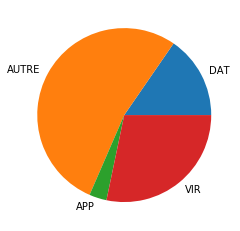

In [94]:
# Create a pieplot
liste_typo = df_3par_volume_plus.typologie.unique()
pourcentage =[df_3par_volume_plus[df_3par_volume_plus.typologie==typo].count()[0]/len(df_3par_volume_plus)*100 for typo in liste_typo]
print(pourcentage)
plt.pie(pourcentage, labels = liste_typo)

plt.show()

## R2cupération des données volumes de IBM et 3par

In [24]:
df_volume = pd.read_csv('df_volume.csv')
df_volume.date = df_volume.date.map(lambda x :  datetime.datetime.strptime(x,'%Y-%m-%d'))
df_volume =df_volume.sort_values("date")
df_volume

,ID,name,pool,offre,capacity,used_capacity,date,origine,typologie,client
518917,70,GTGN_05T2N_DS_GTG_DATA_02,mutapsan05,T2,2248.0,2247.750000,2018-02-11,3par,DAT,GTG
518941,58,IPSS_06T2N_DS_03,mutapsan06,T2,2048.0,1718.000000,2018-02-11,3par,AUTRE,IPS
518942,42,IPSS_06T2N_DS_IPS_DATA_01,mutapsan06,T2,3500.0,2422.625000,2018-02-11,3par,DAT,IPS
518943,54,IPSS_06T2N_DS_IPS_DATA_02,mutapsan06,T2,2048.0,1879.250000,2018-02-11,3par,DAT,IPS
518944,40,IPSS_06T2N_IPSS007_BOS_01,mutapsan06,T2,65.0,26.750000,2018-02-11,3par,AUTRE,IPS
...,...,...,...,...,...,...,...,...,...,...
518313,276,LNAS_19DC1_T2S_ORALNAR_INF_FG1_02,SDC1_T2,T2,200.0,14.550000,2020-11-13,ibm,DAT,LNA
518314,277,LNAS_19DC3_T0S_ORALNAR_CRS_FG2_01,SDC3_T0,T0,2.0,0.109131,2020-11-13,ibm,DAT,LNA
518315,278,LNAS_19DC3_T0S_ORALNAR_FRA_FG2_01,SDC3_T0,T0,50.0,49.840000,2020-11-13,ibm,DAT,LNA
518317,280,LNAS_19DC3_T2S_ORALNAR_DATA_FG2_02,SDC3_T2,T2,300.0,86.560000,2020-11-13,ibm,DAT,LNA


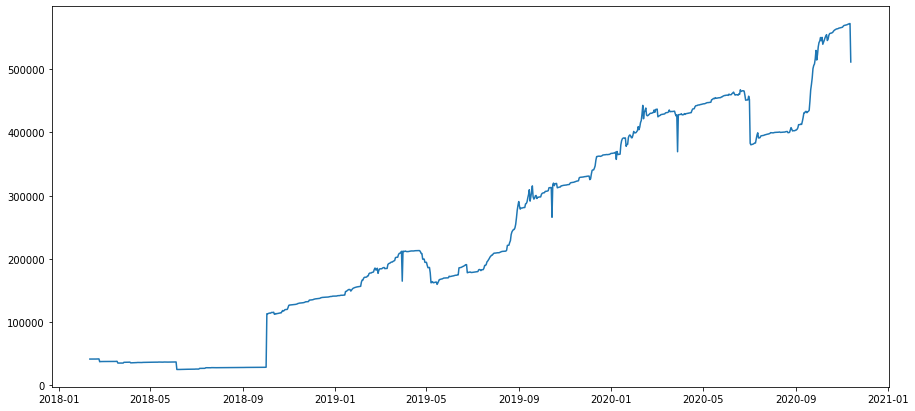

In [25]:
fig = plt.figure(1, figsize=(15, 7))
plt.plot(df_volume.date.unique(),df_volume.groupby('date').used_capacity.sum())

In [89]:
len(df_volume.name.unique())

1475

In [90]:
## tentative 
#df_temp = df_volume[df_volume.date >= "2020-01-01"].copy()
#for i in df_volume[df_volume.date >= "2020-01-01"].date:
#    print(i)
 #   if i.date.day != '01':
 #       df_temp.drop(i.index,inplace = True)
#df_temp

# pour nicolas

In [115]:
df_2020 = df_volume[df_volume.date >= "2020-01-01"].copy()
df_2020

,ID,name,pool,offre,capacity,used_capacity,date,origine,pourcentage_used,typologie,client
281796,0,MUTN_19DC1_T0S_ORASIP_DATA_01,SDC1_T0,T0,190.0,93.320000,2020-01-01,ibm,49.115789,DAT,MUT
281797,1,CMCN_19DC1_T2S_ORACMCF_DATA_FG1_04,SDC1_T2_FCM,T2_FCM,200.0,170.580000,2020-01-01,ibm,85.290000,DAT,CMC
281798,2,CMCN_19DC1_T2S_ORACMCF_DATA_FG1_05,SDC1_T2_FCM,T2_FCM,200.0,170.580000,2020-01-01,ibm,85.290000,DAT,CMC
281799,3,MUTN_19DC3_T0S_ORASIP_DATA_01,SDC3_T0,T0,190.0,93.320000,2020-01-01,ibm,49.115789,DAT,MUT
281800,4,CMCN_19DC1_T2S_ORACMCF_DATA_FG1_06,SDC1_T2_FCM,T2_FCM,200.0,170.580000,2020-01-01,ibm,85.290000,DAT,CMC
...,...,...,...,...,...,...,...,...,...,...,...
589612,79,SIGN_06DC3_T2S_SIGS_01_DS_02,mutapsan06,T2,5120.0,4196.754883,2020-11-12,3par,81.967869,VIR,SIG
589613,73,SNIN_06T2S_ORASNI_BACKUP_01,mutapsan06,T2,45.0,42.944336,2020-11-12,3par,95.431858,DAT,SNI
589614,69,SNIN_06T2S_ORASNI_DATA_FG2_01,mutapsan06,T2,200.0,169.058594,2020-11-12,3par,84.529297,DAT,SNI
589615,70,SNIN_06T2S_ORASNI_DATA_FG2_02,mutapsan06,T2,200.0,170.046875,2020-11-12,3par,85.023438,DAT,SNI


In [127]:
df_2020.groupby('date').used_capacity.sum().iloc[-20:]

date
2020-10-25    563442.545703
2020-10-26    563589.379463
2020-10-27    563898.111562
2020-10-28    564660.602900
2020-10-29    564969.892129
2020-10-30    565163.208418
2020-10-31    565660.278945
2020-11-01    565771.537813
2020-11-02    566188.379277
2020-11-03    567792.782344
2020-11-04    568912.669795
2020-11-05    569244.775732
2020-11-06    569706.009951
2020-11-07    569798.994727
2020-11-08    570109.359814
2020-11-09    570771.137021
2020-11-10    571201.838760
2020-11-11    571822.984551
2020-11-12    571977.842881
2020-11-13    511262.636143
Name: used_capacity, dtype: float64

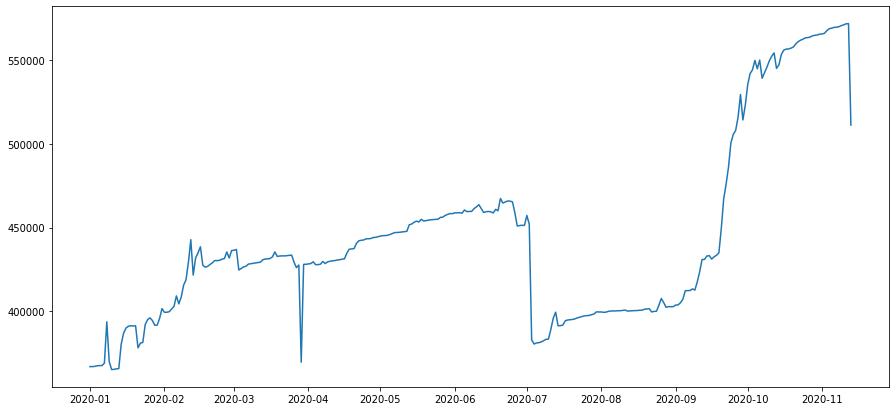

In [116]:
fig = plt.figure(1, figsize=(15, 7))
plt.plot(df_2020.date.unique(),df_2020.groupby('date').used_capacity.sum())

In [117]:
## Enregistrement en csv
df_volume[df_volume.date >= "2020-01-01"].to_csv("stockage_volume_2020.csv", index=False)

In [118]:
df_2020_01_mois = df_2020.copy()
df_2020_01_mois['jour']= df_2020_01_mois.date
df_2020_01_mois.jour = df_2020_01_mois.jour.map(lambda x: str(x)[8:10])
df_2020_01_mois = df_2020_01_mois[df_2020_01_mois.jour=="01"]
df_2020_01_mois

,ID,name,pool,offre,capacity,used_capacity,date,origine,pourcentage_used,typologie,client,jour
281796,0,MUTN_19DC1_T0S_ORASIP_DATA_01,SDC1_T0,T0,190.0,93.320000,2020-01-01,ibm,49.115789,DAT,MUT,01
281797,1,CMCN_19DC1_T2S_ORACMCF_DATA_FG1_04,SDC1_T2_FCM,T2_FCM,200.0,170.580000,2020-01-01,ibm,85.290000,DAT,CMC,01
281798,2,CMCN_19DC1_T2S_ORACMCF_DATA_FG1_05,SDC1_T2_FCM,T2_FCM,200.0,170.580000,2020-01-01,ibm,85.290000,DAT,CMC,01
281799,3,MUTN_19DC3_T0S_ORASIP_DATA_01,SDC3_T0,T0,190.0,93.320000,2020-01-01,ibm,49.115789,DAT,MUT,01
281800,4,CMCN_19DC1_T2S_ORACMCF_DATA_FG1_06,SDC1_T2_FCM,T2_FCM,200.0,170.580000,2020-01-01,ibm,85.290000,DAT,CMC,01
...,...,...,...,...,...,...,...,...,...,...,...,...
589150,79,SIGN_06DC3_T2S_SIGS_01_DS_02,mutapsan06,T2,5120.0,4197.509766,2020-11-01,3par,81.982613,VIR,SIG,01
589151,73,SNIN_06T2S_ORASNI_BACKUP_01,mutapsan06,T2,45.0,42.944336,2020-11-01,3par,95.431858,DAT,SNI,01
589152,69,SNIN_06T2S_ORASNI_DATA_FG2_01,mutapsan06,T2,200.0,169.058594,2020-11-01,3par,84.529297,DAT,SNI,01
589153,70,SNIN_06T2S_ORASNI_DATA_FG2_02,mutapsan06,T2,200.0,170.046875,2020-11-01,3par,85.023438,DAT,SNI,01


In [119]:
## Enregistrement en csv
df_2020_01_mois.to_csv("stockage_mensuel_2020_xx_01.csv", index=False)

In [120]:
df_2020_max = df_2020.copy()
df_2020_max['an_mois']= df_2020_max.date
df_2020_max.an_mois = df_2020_max.an_mois.map(lambda x: str(x)[:7])
df_2020_max = df_2020_max.groupby(['name','an_mois'], as_index= False).agg({"pool":'first', "offre": "first", "origine" : "first","typologie":"first","used_capacity":"max"})
df_2020_max.drop(index = [0], inplace = True) # supprime une ligne nan
df_2020_max

,name,an_mois,pool,offre,origine,typologie,used_capacity
1,APSS_19DC3_T2M_APSS_01_DS_01,2020-10,SDC3_T2,T2,ibm,AUTRE,78.770000
2,APSS_19DC3_T2M_APSS_01_DS_01,2020-11,SDC3_T2,T2,ibm,AUTRE,80.670000
3,BOSN_19DC1_T0M_BOSN_01_DS_01,2020-01,SDC1_T0,T0,ibm,VIR,0.030762
4,BOSN_19DC1_T0M_BOSN_01_DS_01,2020-02,SDC1_T0,T0,ibm,VIR,0.026855
5,BOSN_19DC1_T0M_BOSN_01_DS_01,2020-03,SDC1_T0,T0,ibm,VIR,0.027832
...,...,...,...,...,...,...,...
8425,VEDS_19DC3_T2S_VEDS_01_DS_01,2020-11,SDC3_T2,T2,ibm,VIR,381.460000
8426,VEGN_19DC3_T2S_VEGN_01_DS_01,2020-10,SDC3_T2,T2,ibm,AUTRE,1781.760000
8427,VEGN_19DC3_T2S_VEGN_01_DS_01,2020-11,SDC3_T2,T2,ibm,AUTRE,1781.760000
8428,VEGN_19DC3_T2S_VEGN_01_DS_02,2020-10,SDC3_T2,T2,ibm,AUTRE,636.770000


In [122]:
## Enregistrement en csv
df_2020_max.to_csv("stockage_2020_max_mensuel.csv", index=False)

# création d'un df avec le max du mois pour réduire la granularité.

In [26]:
df_maxdumois = df_volume.copy()
df_maxdumois['mois']= df_maxdumois.date
df_maxdumois.mois = df_maxdumois.mois.map(lambda x : str(x)[:7])
df_maxdumois

,ID,name,pool,offre,capacity,used_capacity,date,origine,typologie,client,mois
518917,70,GTGN_05T2N_DS_GTG_DATA_02,mutapsan05,T2,2248.0,2247.750000,2018-02-11,3par,DAT,GTG,2018-02
518941,58,IPSS_06T2N_DS_03,mutapsan06,T2,2048.0,1718.000000,2018-02-11,3par,AUTRE,IPS,2018-02
518942,42,IPSS_06T2N_DS_IPS_DATA_01,mutapsan06,T2,3500.0,2422.625000,2018-02-11,3par,DAT,IPS,2018-02
518943,54,IPSS_06T2N_DS_IPS_DATA_02,mutapsan06,T2,2048.0,1879.250000,2018-02-11,3par,DAT,IPS,2018-02
518944,40,IPSS_06T2N_IPSS007_BOS_01,mutapsan06,T2,65.0,26.750000,2018-02-11,3par,AUTRE,IPS,2018-02
...,...,...,...,...,...,...,...,...,...,...,...
518313,276,LNAS_19DC1_T2S_ORALNAR_INF_FG1_02,SDC1_T2,T2,200.0,14.550000,2020-11-13,ibm,DAT,LNA,2020-11
518314,277,LNAS_19DC3_T0S_ORALNAR_CRS_FG2_01,SDC3_T0,T0,2.0,0.109131,2020-11-13,ibm,DAT,LNA,2020-11
518315,278,LNAS_19DC3_T0S_ORALNAR_FRA_FG2_01,SDC3_T0,T0,50.0,49.840000,2020-11-13,ibm,DAT,LNA,2020-11
518317,280,LNAS_19DC3_T2S_ORALNAR_DATA_FG2_02,SDC3_T2,T2,300.0,86.560000,2020-11-13,ibm,DAT,LNA,2020-11


In [27]:
# création d'un dataframe avec pour chaque volume la capacité utilisée max dans le mois
data_mois = pd.DataFrame()
for v in df_maxdumois.name.unique():
    liste_pool =[]
    # création d'un df temporaire
    df_temp = df_maxdumois[df_maxdumois.name == v]
    
    # récupération de son pool
    liste_pool.append(df_temp.pool.unique()[0])
    typo = df_temp.typologie.unique()[0]
    offre = df_temp.offre.unique()[0]
    
    # agrégation sur le mois en prenant la valeur max dans le mois pour le volume
    df_temp = pd.DataFrame(df_temp.groupby('mois').used_capacity.max())
    df_temp['name_volume']= np.array(v)
    df_temp['année_mois'] = df_temp.index
    df_temp['pool']= np.array(liste_pool[0])
    df_temp['typologie']=np.array(typo)
    df_temp['offre']= np.array(offre)
    
    data_mois = pd.concat([data_mois,df_temp])
    data_mois = data_mois.sort_values(by='année_mois')
data_mois

,used_capacity,name_volume,année_mois,pool,typologie,offre
mois,,,,,,
2018-02,2247.750000,GTGN_05T2N_DS_GTG_DATA_02,2018-02,mutapsan05,DAT,T2
2018-02,1146.500000,MUTS_06T2N_DS_SANTE_SAS_QOS,2018-02,mutapsan06,AUTRE,T2
2018-02,5.250000,IAXI_05T2S_OVM-RAC02_02,2018-02,mutapsan05,AUTRE,T2
2018-02,2415.875000,MUTS_05T2N_DS_SANTE_DATA_01,2018-02,mutapsan05,DAT,T2
2018-02,3046.875000,MUTN_05T2N_DS_PLTMUT_DATA_01,2018-02,mutapsan05,DAT,T2
...,...,...,...,...,...,...
2020-11,1904.640000,POLS_19DC1_T2S_POLS_01_DS_07,2020-11,SDC1_T2,AUTRE,T2
2020-11,7.280000,ELEN_19DC1_T0S_ORAT01_DATA_01,2020-11,SDC1_T0,DAT,T0
2020-11,0.031006,CR2N_19DC1_T0S_CR2N_02_DS_01,2020-11,SDC1_T0,AUTRE,T0


In [67]:
# vérification que les volumes sont dans un pool seulement p. Pas de doublon...
#print(len(data_mois.groupby('name_volume')))
#print(len(data_mois.name_volume.unique()))

In [68]:
# vérification que les volumes sont dans un pool seulement p. Pas de doublon...
#dico = {}
#for i in range(len(data_mois)):
#   if data_mois.iloc[i].name_volume not in dico.keys():
#        dico[data_mois.iloc[i].name_volume] = data_mois.iloc[i].pool
#    else:
#        if dico[data_mois.iloc[i].name_volume] != data_mois.iloc[i].pool:
#            print(dico[data_mois.iloc[i].name_volume], 'new',data_mois.iloc[i].pool)

In [28]:
data_mois[data_mois.typologie==t][data_mois.name_volume == v]

NameError: name 't' is not defined

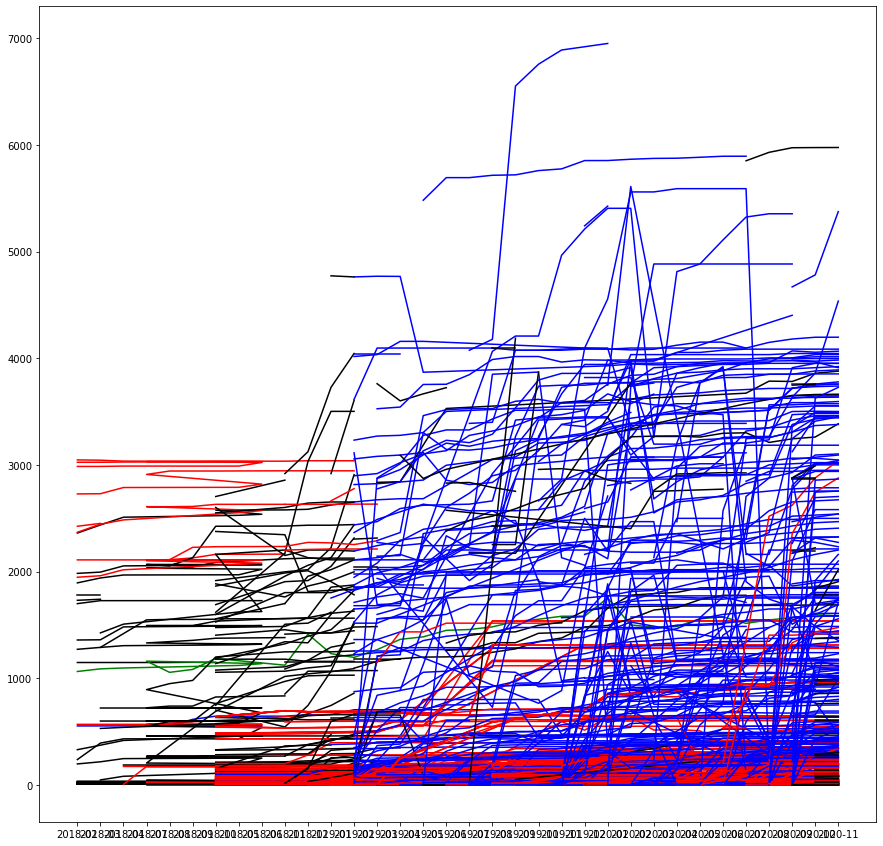

In [29]:
# graphe de l'évolution de la volumétrie pour chaque volume
fig = plt.figure(1, figsize=(15, 15))

for v in data_mois.name_volume.unique():
    if data_mois[data_mois.name_volume == v].typologie[0] == 'DAT':
         color = 'red'
    elif data_mois[data_mois.name_volume == v].typologie[0] == 'VIR':
        color = 'blue'
    elif data_mois[data_mois.name_volume == v].typologie[0] == 'APP':
        color = 'green'
    else:
        color='black'
    plt.plot(data_mois[data_mois.name_volume == v].index,data_mois[data_mois.name_volume == v].used_capacity, color = color)

## Tentative de classification des courbes 

In [71]:
from sklearn.model_selection import train_test_split
from tslearn.datasets import CachedDatasets

seed = 0
np.random.seed(seed)

X_train, y_train, X_test, y_test = CachedDatasets().load_dataset(data_mois)
X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:32])
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

ValueError: unknown type str128

[7.3923532755516606, 59.993193955167555, 32.43688724208798, 0.1083644009634926, 0.06920112622931808]


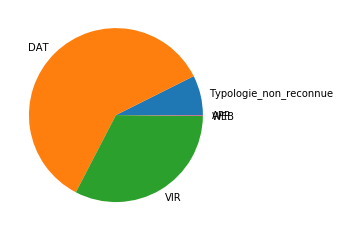

In [72]:
# Create a pieplot
liste_typo = df_volume.typologie.unique()
pourcentage =[df_volume[df_volume.typologie==typo].count()[0]/len(df_volume)*100 for typo in liste_typo]
print(pourcentage)
plt.pie(pourcentage, labels = liste_typo)

plt.show()

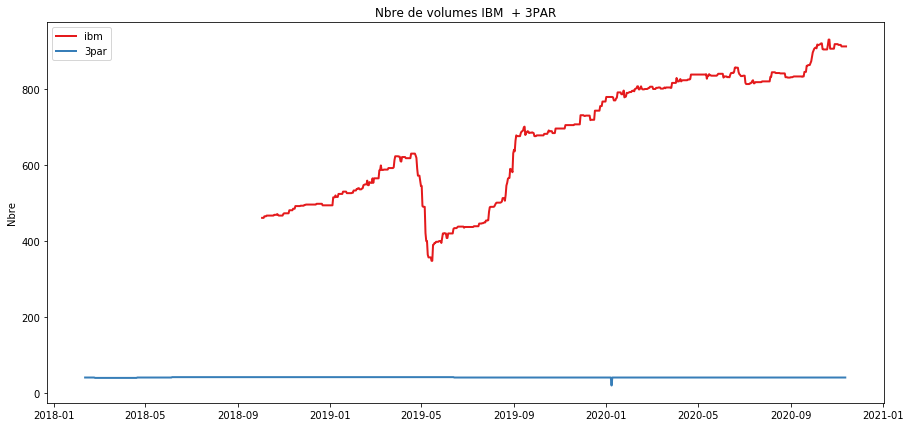

In [30]:
# visualisation de l'évolution des données pour les volumes IBM et 3par

fig = plt.figure(1, figsize=(15, 7))
plt.plot( df_volume[df_volume.origine == 'ibm'].date.unique().copy(),df_volume[df_volume.origine == 'ibm'].groupby('date').used_capacity.count().copy(),marker='', color=palette(0), linewidth=2, label='ibm')
plt.plot( df_volume[df_volume.origine == '3par'].date.unique().copy(),df_volume[df_volume.origine == '3par'].groupby('date').used_capacity.count().copy(),marker='', color=palette(1), linewidth=2, label='3par')

plt.title('Nbre de volumes IBM  + 3PAR')
plt.ylabel('Nbre')
plt.legend()

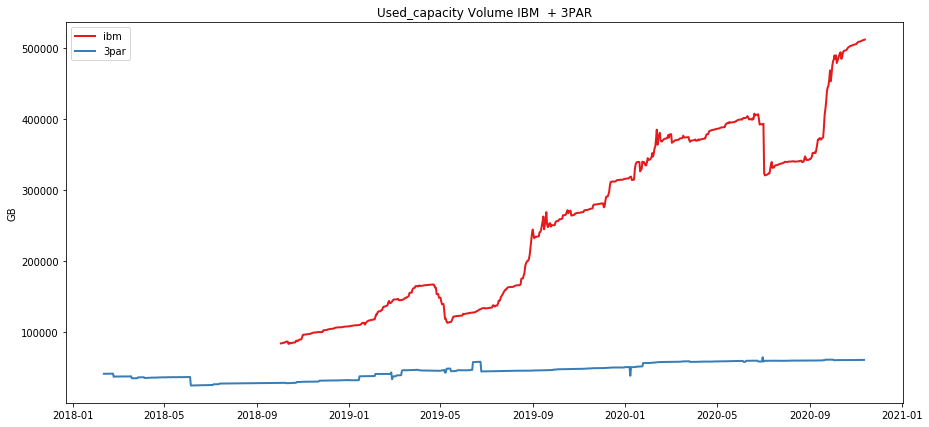

In [31]:
# visualisation de l'évolution des données pour les volumes IBM et 3par

fig = plt.figure(1, figsize=(15, 7))
plt.plot( df_volume[df_volume.origine == 'ibm'].date.unique().copy(),df_volume[df_volume.origine == 'ibm'].groupby('date').used_capacity.sum().copy(),marker='', color=palette(0), linewidth=2, label='ibm')
plt.plot( df_volume[df_volume.origine == '3par'].date.unique().copy(),df_volume[df_volume.origine == '3par'].groupby('date').used_capacity.sum().copy(),marker='', color=palette(1), linewidth=2, label='3par')

plt.title('Used_capacity Volume IBM  + 3PAR')
plt.ylabel('GB')
plt.legend()

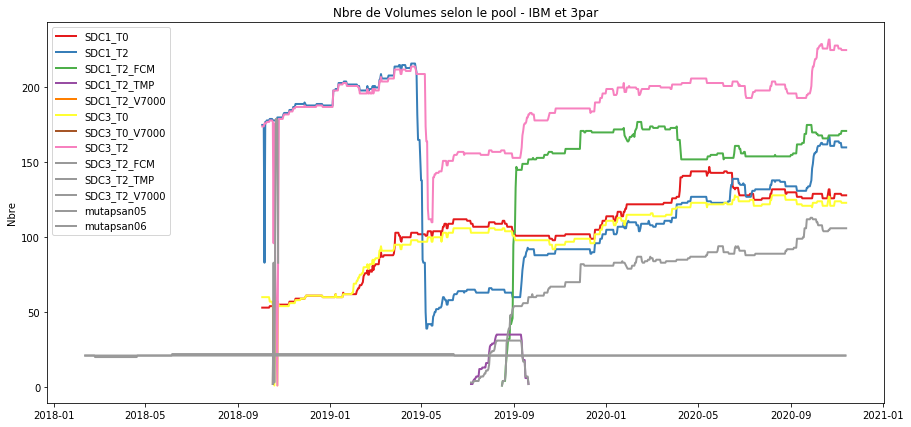

In [32]:
# visualisation de l'évolution des données pour les volumes par pool
full_list = sorted(df_volume.pool.unique())
fig = plt.figure(1, figsize=(15, 7))
num=0
for p in full_list:
    plt.plot( df_volume[df_volume.pool == p].date.unique(),df_volume[df_volume.pool == p].groupby('date').used_capacity.count(),marker='', color=palette(num), linewidth=2, label=p)
    num+=1
plt.title('Nbre de Volumes selon le pool - IBM et 3par')
plt.ylabel('Nbre')
plt.legend()

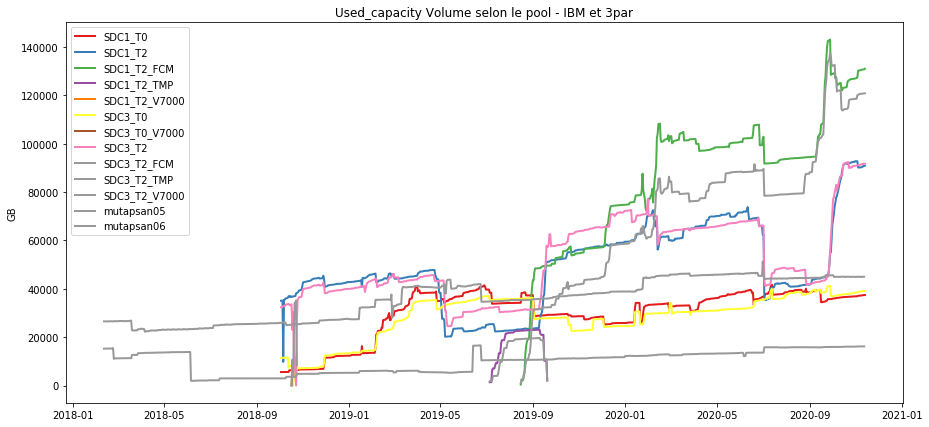

In [33]:
# visualisation de l'évolution des données pour les volumes par pool
full_list = sorted(df_volume.pool.unique())
fig = plt.figure(1, figsize=(15, 7))
num=0
for p in full_list:
    plt.plot( df_volume[df_volume.pool == p].date.unique(),df_volume[df_volume.pool == p].groupby('date').used_capacity.sum(),marker='', color=palette(num), linewidth=2, label=p)
    num+=1
plt.title('Used_capacity Volume selon le pool - IBM et 3par')
plt.ylabel('GB')
plt.legend()

In [34]:
# visualisation de l'évolution de la saturation moyenne des volumes par pool
full_list = sorted(df_volume.pool.unique())
fig = plt.figure(1, figsize=(15, 7))
num=0
for p in full_list:
    plt.plot( df_volume[df_volume.pool == p].date.unique(),df_volume[df_volume.pool == p].groupby('date').pourcentage_used.mean(),marker='', color=palette(num), linewidth=2, label=p)
    num+=1
plt.title('Pourcentage de saturation moyen des Volumes selon le pool - IBM et 3par')
plt.ylabel('%')
plt.legend()

AttributeError: 'DataFrameGroupBy' object has no attribute 'pourcentage_used'

<Figure size 1080x504 with 0 Axes>

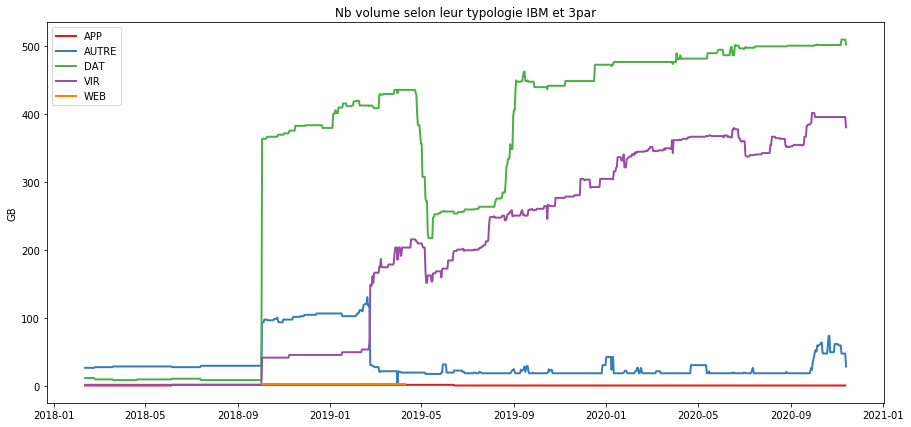

In [35]:
# visualisation de l'évolution des données pour les volumes selon leur typologie
list_typo = sorted(df_volume.typologie.unique())
dates= df_volume.date.unique()
fig = plt.figure(1, figsize=(15, 7))
num=0
for t in list_typo:

    df_temp = df_volume[df_volume.typologie == t].sort_values(by="date")
    plt.plot(df_temp.date.unique(),df_temp.groupby('date').used_capacity.count(),marker='', color=palette(num), linewidth=2, label=t)
    num+=1
plt.title('Nb volume selon leur typologie IBM et 3par')
plt.ylabel('GB')
plt.legend()

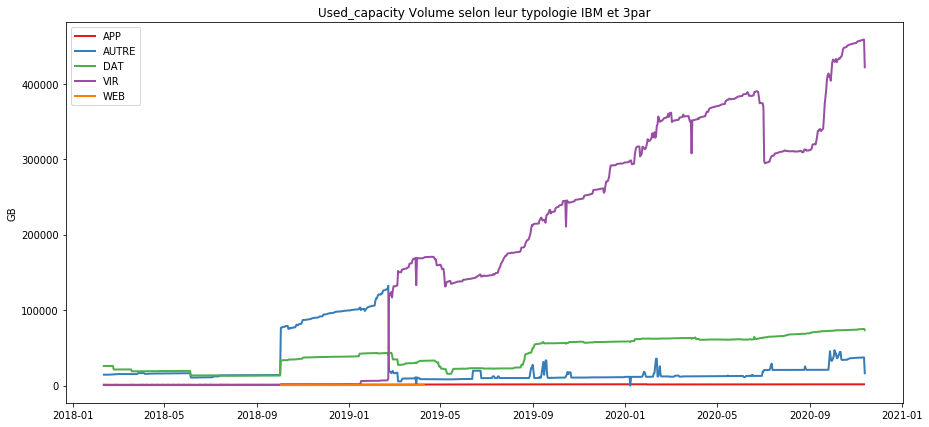

In [36]:
# visualisation de l'évolution des données pour les volumes selon leur typologie
list_typo = sorted(df_volume.typologie.unique())
dates= df_volume.date.unique()
fig = plt.figure(1, figsize=(15, 7))
num=0
for t in list_typo:

    df_temp = df_volume[df_volume.typologie == t].sort_values(by="date")
    plt.plot(df_temp.date.unique(),df_temp.groupby('date').used_capacity.sum(),marker='', color=palette(num), linewidth=2, label=t)
    num+=1
plt.title('Used_capacity Volume selon leur typologie IBM et 3par')
plt.ylabel('GB')
plt.legend()

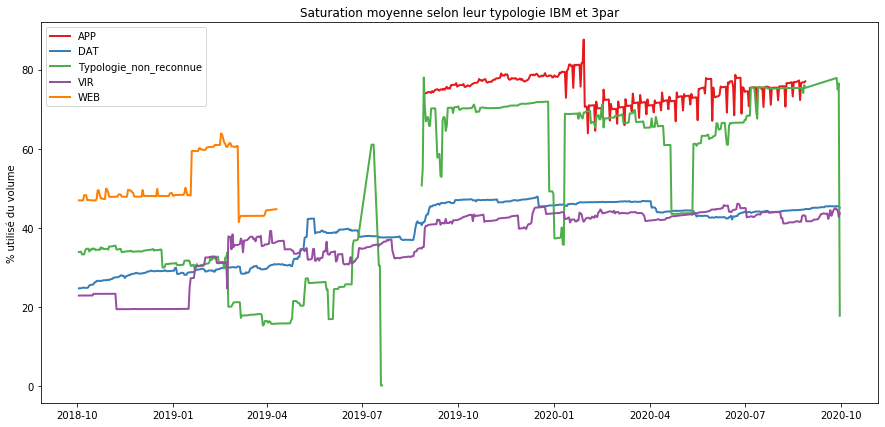

In [81]:
# visualisation de l'évolution des données pour les volumes selon leur typologie
list_typo = sorted(df_volume.typologie.unique())
dates= df_volume.date.unique()
fig = plt.figure(1, figsize=(15, 7))
num=0
for t in list_typo:
    df_temp = df_volume[df_volume.typologie == t].sort_values(by="date")
    plt.plot(df_temp.date.unique(),df_temp.groupby('date').pourcentage_used.mean(),marker='', color=palette(num), linewidth=2, label=t)
    num+=1
plt.title('Saturation moyenne selon leur typologie IBM et 3par')
plt.ylabel('% utilisé du volume')
plt.legend()

In [82]:
# création d'un DF regroupant les volumes IBM et 3par avec une seule donnée par mois

df_volume_month = df_volume.copy()
liste_année_mois = []
for i in df_volume_month.date:
    liste_année_mois.append(str(i)[:7])
df_volume_month['année_mois'] = liste_année_mois

df_volume_month

,ID,name,pool,offre,capacity,used_capacity,date,origine,pourcentage_used,typologie,client,année_mois
0,0,INFS_19DC1_T0M_TEST_EXLIDAT1_01,SDC3_T0,T0,10.0,9.830000,2018-10-03,ibm,98.300000,Typologie_non_reconnue,Client_non_reconnu,2018-10
1,0,INFS_19DC1_T0M_TEST_EXLIDAT1_01,SDC1_T0,T0,10.0,9.830000,2018-10-03,ibm,98.300000,Typologie_non_reconnue,Client_non_reconnu,2018-10
2,1,CMCN_19DC1_T2S_ORACMCF_DATA_FG1_04,SDC1_T2,T2,200.0,44.460000,2018-10-03,ibm,22.230000,DAT,CMC,2018-10
3,2,CMCN_19DC1_T2S_ORACMCF_DATA_FG1_05,SDC1_T2,T2,200.0,44.470000,2018-10-03,ibm,22.235000,DAT,CMC,2018-10
4,3,INFS_19DC1_T2M_TEST_EXLIDAT1_01,SDC3_T2,T2,10.0,10.530000,2018-10-03,ibm,105.300000,Typologie_non_reconnue,Client_non_reconnu,2018-10
...,...,...,...,...,...,...,...,...,...,...,...,...
525998,71,SNIN_06T2S_ORASNI_DATA_FG2_03,mutapsan06,T2,200.0,170.034180,2020-08-28,3par,85.017090,DAT,SNI,2020-08
525999,72,SNIN_06T2S_ORASNI_DATA_FG2_04,mutapsan06,T2,200.0,170.041016,2020-08-28,3par,85.020508,DAT,SNI,2020-08
526000,68,SNIN_06T2S_ORASNI_FRA_FG2_01,mutapsan06,T2,20.0,10.547852,2020-08-28,3par,52.739258,DAT,SNI,2020-08
526001,66,SNIN_06T2S_ORASNI_OCR_01_SDC3,mutapsan06,T2,0.5,0.008789,2020-08-28,3par,1.757812,DAT,SNI,2020-08


In [ ]:
df_1_du_mois= df_volume_month.copy()
df_1_du_mois['jour'] = df_1_du_mois.date
df_1_du_mois.jour = df_1_du_mois.jour.map(lambda x : str(x)[8:10])
df_1_du_mois = df_1_du_mois[df_1_du_mois.jour == "01"]
df_1_du_mois

In [ ]:
# visualisation de l'évolution des données pour les volumes IBM et 3par en prenant la valeur en début de mois
liste_mois=df_volume_month.année_mois.unique()
fig = plt.figure(1, figsize=(15, 7))
num=0
for i in ['3par','ibm']:
    df_temp = df_1_du_mois[df_1_du_mois.origine == i].sort_values(by='année_mois')
    plt.plot(df_temp.année_mois.unique(),df_temp.groupby('année_mois').used_capacity.sum() , marker='', color=palette(num), linewidth=2, label=i)
    num+=1
plt.title('Used_capacity des Volumes IBM  + 3PAR')
plt.ylabel('GB')
plt.legend()

In [ ]:
df_1_du_mois

In [ ]:
liste_mois= sorted(df_1_du_mois.année_mois.unique().tolist())
liste_typo =  sorted(df_1_du_mois.typologie.unique().tolist())
liste_pool= ['SDC1_T0', 'SDC1_T2', 'SDC1_T2_FCM', 'SDC3_T0', 'SDC3_T2', 'SDC3_T2_FCM', 'mutapsan05']
i = 1

for t in liste_typo:
    x = pd.DataFrame(df_1_du_mois[df_1_du_mois.typologie == t].groupby(['année_mois','pool']).used_capacity.sum())
    x.unstack().plot()
    i+=1
    plt.title(t)


In [ ]:
# visualisation de l'évolution des données pour les volumes IBM et 3par en prenant la valeur en début de mois
liste_mois= sorted(df_1_du_mois.année_mois.unique().tolist())
liste_typo =  ['DAT','VIR','APP', 'Typologie_non_reconnue' ]
liste_pool= ['SDC1_T0', 'SDC1_T2', 'SDC1_T2_FCM', 'SDC3_T0', 'SDC3_T2', 'SDC3_T2_FCM', 'mutapsan05']

In [ ]:
num=0
df_DAT = df_1_du_mois[df_1_du_mois.typologie == "DAT"].copy()

fig = plt.figure(i, figsize=(15, 7))
for p in sorted(df_DAT.pool.unique()):
    plt.plot(df_DAT[df_DAT.pool==p].sort_values(by = 'année_mois').année_mois.unique(),df_DAT[df_DAT.pool==p].groupby(['année_mois']).used_capacity.sum() , marker='', color=palette(num), linewidth=2, label=p)
    num+=1

plt.title('Typologie DAT')
plt.ylabel('GB')
plt.legend()

In [ ]:
num=0
df_VIR = df_1_du_mois[df_1_du_mois.typologie == "VIR"].copy()
fig = plt.figure(i, figsize=(15, 7))
for p in sorted(df_VIR.pool.unique()):
    plt.plot(df_VIR[df_VIR.pool==p].année_mois.unique(),df_VIR[df_VIR.pool==p].groupby(['année_mois']).used_capacity.sum() , marker='', color=palette(num), linewidth=2, label=p)
    num+=1

plt.title('Typologie VIR')
plt.ylabel('GB')
plt.legend()

In [ ]:
num=0
df_APP = df_1_du_mois[df_1_du_mois.typologie == "APP"].copy()
fig = plt.figure(i, figsize=(10, 7))
for p in sorted(df_APP.pool.unique()):
    plt.plot(df_APP[df_APP.pool==p].année_mois.unique(),df_APP[df_APP.pool==p].groupby(['année_mois']).used_capacity.sum() , marker='', color=palette(num), linewidth=2, label=p)
    num+=1

plt.title('Typologie APP')
plt.ylabel('GB')
plt.legend()

In [ ]:
num=0
df_non_reconnu = df_1_du_mois[df_1_du_mois.typologie == "Typologie_non_reconnue"].copy()
fig = plt.figure(i, figsize=(10, 7))
longueur_df =[]
    
for p in ['mutapsan05','mutapsan06','SDC1_T0','SDC1_T2','SDC3_T0','SDC3_T2']:
    plt.plot(df_non_reconnu[df_non_reconnu.pool==p].année_mois.unique(),df_non_reconnu[df_non_reconnu.pool==p].groupby(['année_mois']).used_capacity.sum() , marker='', color=palette(num), linewidth=2, label=p)
    num+=1

plt.title('Typologie_non_reconnue')
plt.ylabel('GB')
plt.legend()

In [ ]:
df_1_du_mois

In [ ]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_1_du_mois.groupby(['année_mois','typologie']).sum()['used_capacity'].unstack().plot(ax=ax)
plt.ylabel('GB')
plt.title("Capacité utilisée selon la typologie des volumes")

In [ ]:
for p in df_1_du_mois.typologie.unique():
    # plot data
    fig, ax = plt.subplots(figsize=(15,7))
    # use unstack()
    df_1_du_mois[df_1_du_mois.typologie ==p].groupby(['année_mois','pool']).sum()['used_capacity'].unstack().plot(ax=ax)
    plt.title("Typologie "+p)
    plt.ylabel('GB')

In [ ]:
df_volume_single = pd.DataFrame(df_1_du_mois[['pool','name','année_mois','typologie','used_capacity']].groupby(['pool','name','année_mois']).used_capacity.sum())
df_volume_single

## Travail avec le max du mois pour chaque volume

In [ ]:
df_max_du_mois = pd.DataFrame(df_volume_month[['name','pool','offre','année_mois','used_capacity']].groupby(by=['pool','name','année_mois']).used_capacity.max().copy())
df_max_du_mois

In [ ]:
liste_pool =[]
liste_volumes =[]
liste_dates =[]
for i in df_max_du_mois.index:
    liste_pool.append(i[0])
    liste_volumes.append(i[1])
    liste_dates.append(i[2])
print(len(liste_pool))
print(len(liste_volumes))
print(len(liste_dates))

In [ ]:
df_maxdumois = pd.DataFrame({"name_volume": liste_volumes,"pool":liste_pool,"mois":liste_dates,"used_capacity":df_max_du_mois.used_capacity })
df_maxdumois